# <font color=#214B99>Projet 7 - D√©tectez les Bad Buzz gr√¢ce au Deep Learning</font>

# <font color=#009BFA>Approche 3 : Mod√®le sur mesure avanc√©</font>


## Objectif du projet : 
- **D√©velopper le prototype d‚Äôun produit IA permettant de pr√©dire le sentiment associ√© √† un tweet**

## Trois approches :
- **Approche 1 : 'API sur √©tag√®re' en utilisant l‚ÄôAPI du service cognitif propos√© par Microsoft Azure pour l‚Äôanalyse de sentiment**
- **Approche 2 : 'Mod√®le sur mesure simple' en utilisant le service Azure Machine Learning Studio**
- **Approche 3 : 'Mod√®le sur mesure avanc√©' en utilisant le service Azure Machine Learning pour d√©velopper un mod√®le bas√© sur des r√©seaux de neurones profonds pour pr√©dire le sentiment associ√© √† un tweet**.


## <font color="#009BFA">Sommaire</font>
1. [**Pr√©paration des donn√©es**](#section_1)
    - Chargement des donn√©es
    - Nettoyage des donn√©es
    - Identification de la cible
    - S√©paration du jeu de donn√©es <br><br>
2. [**Pr√©traitement des donn√©es textuelles (PreProcessing)**](#section_2)
    - Essai de deux techniques de pr√©traitement
        - Nettoyage des Tweets avec la librairie 'Preprocessor'
        - Lemmatization des Tweets avec la librairie 'SpaCy'
    - Pr√©traitement des diff√©rents DataFrame <br><br>
3. [**Approche Machine Learning classique (mod√®le de r√©f√©rence)**](#section_3)
    - Choix de la m√©trique d'√©valuation
    - Repr√©sentation des donn√©es textuelles : TFIDF
    - Mod√©lisation : Regression logistique
    - Evaluation <br><br>
4. [**Approche Deep Learning (mod√®les avanc√©s)**](#section_4)
    - Repr√©sentation des donn√©es textuelles : plongements de mots (Words Embeddings)
        - Mod√®les GloVe classique pr√©entrain√©
        - Mod√®le pr√©entrain√© sur des Tweets : GloVe Twitter
    - Mod√©lisation : R√©seaux de neurones
        - Cr√©ation des jeux de donn√©es adapt√©s aux mod√®les r√©seaux de neurones
        - Mod√©lisations utilisant diff√©rentes architectures
        - Evaluation
        - S√©lection du meilleur mod√®le
        - Optimisation du meilleur mod√®le
            - Optimisation du plongement de mots
                - Mod√®le FastText entrain√© sur les Tweets du jeu d'entrainement
            - Optimisation des hyperparam√®tres
                - Optimisation des Dropout
                - Optimisation du Learning Rate
            - Choix du meilleur nombre d'epochs
        - Evaluation du meilleur mod√®le optimis√©
        - Sauvegarde du meilleur mod√®le
        - Pr√©dictions sur le jeu de donn√©es 'app' pour comparaison avec les autres approches <br><br>
5. [**Prototype permettant de pr√©dire le sentiment associ√© √† un tweet**](#section_5) 
    - Fonction 'prototype'
    - Test du mod√®le en local

In [1]:
import io

from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

import gensim.downloader as api

import spacy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    SpatialDropout1D,
    Input,
    Conv1D,
    GlobalMaxPooling1D,
)
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

import keras_tuner as kt
from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.text import tokenizer_from_json

from gensim.models import FastText

import preprocessor as tweetpreprocessor

import time
import random as python_random

# Valide code pep8
%load_ext nb_black
from datetime import datetime

now = datetime.now().isoformat()
print("Lanc√© le           : " + now)

import warnings

warnings.filterwarnings("ignore")

Lanc√© le           : 2022-06-30T21:06:04.807302


<IPython.core.display.Javascript object>

In [2]:
nlp = spacy.load("en_core_web_sm")

<IPython.core.display.Javascript object>

In [3]:
import os

os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices"

<IPython.core.display.Javascript object>

##### On fixe l'al√©atoire pour la reproductibilit√© des mod√©lisations :

In [4]:
SEED = 0
np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

<IPython.core.display.Javascript object>

 # <span style='color:blue' id="section_1" >1. Pr√©paration des donn√©es</span>

>## <span style='color:green' id="section_1_1" >1.1. Chargement des donn√©es</span>

In [5]:
path_dataset = "airparadis_dataset/"

<IPython.core.display.Javascript object>

In [6]:
data = pd.read_csv(
    path_dataset + "training.1600000.processed.noemoticon.csv",
    nrows=1000000,
    encoding="ISO-8859-1",
    header=None,
)

<IPython.core.display.Javascript object>

In [7]:
data.shape

(1000000, 6)

<IPython.core.display.Javascript object>

In [8]:
data

0           1                             2         3  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...    ..         ...                           ...       ...   
999995  4  1879942807  Thu May 21 23:36:19 PDT 2009  NO_QUERY   
999996  4  1879942922  Thu May 21 23:36:20 PDT 2009  NO_QUERY   
999997  4  1879942975  Thu May 21 23:36:21 PDT 2009  NO_QUERY   
999998  4  1879943113  Thu May 21 23:36:22 PDT 2009  NO_QUERY   
999999  4  1879943219  Thu May 21 23:36:24 PDT 2009  NO_QUERY   

                      4                                                  5  
0       _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1         scotthamilton  is upset that he can't update his Facebook by ...  
2              mattycus  @Kenichan I dived many times for the ball. Man...  
3               ElleCTF    my whole body feels itchy and like its on fire   
4                Karoli  @nationwideclass no, it's not behaving at all....  
...                 ...                                                ...  
999995          divabat           @healingsinger thank you, i needed that   
999996         nick1975  @vactress http://bit.ly/cADea  Maybe this is m...  
999997            znmeb  @Brat13 Hell, Windows 7 will be out of my pric...  
999998          virmani  @jigardoshi neah.. i wish! just reminiscing  r...  
999999       redcomet81  @MsTeagan ...and by the way: I rewatched Sun G...  

[1000000 rows x 6 columns]

<IPython.core.display.Javascript object>

>## <span style='color:green' id="section_1_2" >1.2. Nettoyage des donn√©es</span>

- Nous gardons uniquement les colonnes 0 et 5 qui nous seront utiles pour notre √©tude
- Nous renommons les colonnes 'SENTIMENT' et 'TWEET'

In [9]:
df_tweets_total = pd.concat([data[0], data[5]], axis=1)

<IPython.core.display.Javascript object>

In [10]:
df_tweets_total = df_tweets_total.rename(columns={0: "SENTIMENT", 5: "TWEET"})

<IPython.core.display.Javascript object>

In [11]:
df_tweets_total

SENTIMENT                                              TWEET
0               0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1               0  is upset that he can't update his Facebook by ...
2               0  @Kenichan I dived many times for the ball. Man...
3               0    my whole body feels itchy and like its on fire 
4               0  @nationwideclass no, it's not behaving at all....
...           ...                                                ...
999995          4           @healingsinger thank you, i needed that 
999996          4  @vactress http://bit.ly/cADea  Maybe this is m...
999997          4  @Brat13 Hell, Windows 7 will be out of my pric...
999998          4  @jigardoshi neah.. i wish! just reminiscing  r...
999999          4  @MsTeagan ...and by the way: I rewatched Sun G...

[1000000 rows x 2 columns]

<IPython.core.display.Javascript object>

In [12]:
df_tweets = df_tweets_total.groupby("SENTIMENT").apply(lambda x: x.sample(70000))

<IPython.core.display.Javascript object>

In [13]:
df_tweets["SENTIMENT"].value_counts()

0    70000
4    70000
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

##### Ce jeu de donn√©es contient :
- Les Tweets (colonne 'TWEET')
- Le sentiment associ√© √† chaque Tweet (colonne 'SENTIMENT')

>## <span style='color:green' id="section_1_3" >1.3. Identification de la cible</span>

- La cible correspond √† la colonne 'SENTIMENT'
- Il y a 2 valeurs possibles : 0 et 4
    - La valeur 0 correspond √† un sentiment n√©gatif
    - La valeur 4 correspond √† un sentiment positif
- Pour plus de coh√©rence, nous allons remplacer la valeur 4 par 1
- Les Tweets sont √©quir√©partis par sentiment

In [14]:
df_tweets["SENTIMENT"].value_counts()

0    70000
4    70000
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
df_tweets["SENTIMENT"] = df_tweets["SENTIMENT"].replace(4, 1)

<IPython.core.display.Javascript object>

In [16]:
df_tweets

SENTIMENT                                              TWEET
SENTIMENT                                                                     
0         158171          0  oh god whits pissed n shes drivin, in the rain...
          480078          0                    driving back from myrtle beach 
          258275          0  Saying byebye to AM's Refuge and Extension  wi...
          20237           0  @SarahSaner Did you she fell of her horse agai...
          354111          0                        @SalioElSol08  save me any.
...                     ...                                                ...
4         868144          1  @ThatKevinSmith love the twitter pg background...
          989183          1  @JenniferJ13 OMG you were what?! thats sooo co...
          853695          1  : Maybe they'll pump other sorts of alkie inst...
          879628          1  @IfUuseitUcanfly and BTW James is on here now....
          830402          1  @anikainlondon yay! spotify!  i'm listening to...

[140000 rows x 2 columns]

<IPython.core.display.Javascript object>

In [17]:
df_tweets["SENTIMENT"].value_counts()

0    70000
1    70000
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

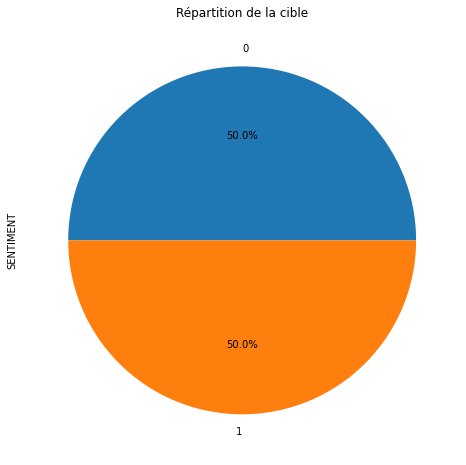

<IPython.core.display.Javascript object>

In [18]:
_ = (
    df_tweets["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

>## <span style='color:green' id="section_1_4" >1.4. S√©paration du jeu de donn√©es</span>

### Cr√©ation des jeux de donn√©es suivants :

- 'Approach' (app) : utilis√© pour comparer les trois approches et s√©lectionner la meilleure parmi les trois (API sur √©tag√®re, mod√®le simple, mod√®le avanc√©)
- 'Validation' (val) : utilis√© pour la s√©lection du meilleur mod√®le avanc√© et l'optimisation des hyperparam√®tres
- 'Train' (train) : utilis√© pour entrainer le meilleur mod√®le et obtenir le mod√®le qui sera d√©ploy√©
- 'Train_sample (train_sample)' : √©chantillon extrait du jeu 'Train' pour entrainer les diff√©rents mod√®les avanc√©s
- 'Test' (test) : utilis√© pour l'√©valuation finale du meilleur mod√®le avanc√©

#### Remarques :
- Les jeux de donn√©es sont stratifi√©s afin de garder la proportion de sentiments positifs et n√©gatifs
- Nous avons √©t√© particuli√®rement attentifs √† ne pas toucher le jeu de test afin qu'il n'y ait pas de fuite de donn√©es

>## <span style='color:#1e488f' >Cr√©ation du DataFrame `Approach`</span>

In [19]:
APP_SIZE = 2000

<IPython.core.display.Javascript object>

In [20]:
df_app, df_tweets = train_test_split(
    df_tweets, stratify=df_tweets["SENTIMENT"], train_size=APP_SIZE, random_state=SEED
)

<IPython.core.display.Javascript object>

In [21]:
df_tweets

SENTIMENT                                              TWEET
SENTIMENT                                                                     
4         877703          1  @JoshRamsay I just noticed you look like Justi...
          987313          1  @sidv hahaha!! ur a riot! Pak and wipe out the...
          998057          1  me first poppies flowering  http://www.fab-des...
          860512          1  @ttakeiteasy It is a great show. You are sooo ...
          900547          1  @trinemt I'm excited! Hust let me know when yo...
...                     ...                                                ...
0         209422          0  @rachmurrayX why dont i have that music channe...
4         939339          1  @LaGraphixGirl your day has just begun huh   Y...
0         236641          0  chilling...hmm...listening to music...download...
          659661          0  My skin doctor said I have to remove my moles ...
4         819270          1  Painted me nails. My fav color. It looks natur...

[138000 rows x 2 columns]

<IPython.core.display.Javascript object>

In [22]:
df_tweets = df_tweets.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [23]:
df_tweets

SENTIMENT                                              TWEET
0               1  @JoshRamsay I just noticed you look like Justi...
1               1  @sidv hahaha!! ur a riot! Pak and wipe out the...
2               1  me first poppies flowering  http://www.fab-des...
3               1  @ttakeiteasy It is a great show. You are sooo ...
4               1  @trinemt I'm excited! Hust let me know when yo...
...           ...                                                ...
137995          0  @rachmurrayX why dont i have that music channe...
137996          1  @LaGraphixGirl your day has just begun huh   Y...
137997          0  chilling...hmm...listening to music...download...
137998          0  My skin doctor said I have to remove my moles ...
137999          1  Painted me nails. My fav color. It looks natur...

[138000 rows x 2 columns]

<IPython.core.display.Javascript object>

In [24]:
df_tweets["SENTIMENT"].value_counts()

1    69000
0    69000
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

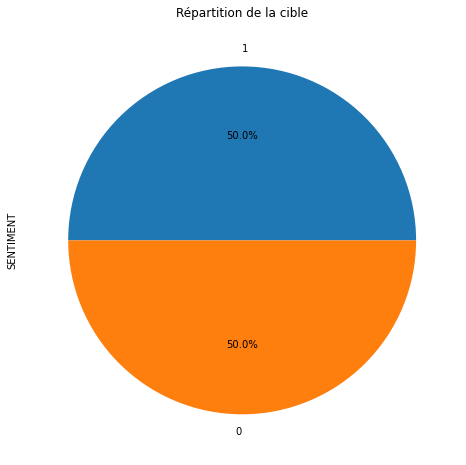

<IPython.core.display.Javascript object>

In [25]:
_ = (
    df_tweets["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

In [26]:
df_app = df_app.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [27]:
df_app

SENTIMENT                                              TWEET
0             1                              @seanlb Got them all 
1             0              On my way in to the office...raining 
2             0                      going to my cousin's funeral 
3             1                                     @ShannonRenee 
4             0  Downloading the final iPhone 3.0 SDK from Appl...
...         ...                                                ...
1995          1  haha I know all the conversations and I could ...
1996          0  Missing my phone, which is at the bottom of th...
1997          0        Please noooo...Dave Gahan has cancer scare 
1998          0  @ravenme in NYC, you don't have to shoot yours...
1999          0  Going to the city to babysit for 11 hours... A...

[2000 rows x 2 columns]

<IPython.core.display.Javascript object>

#### Taille du jeu 'Approach'

In [28]:
len(df_app["SENTIMENT"])

2000

<IPython.core.display.Javascript object>

#### R√©partition du jeu 'Approach'

In [29]:
df_app["SENTIMENT"].value_counts()

1    1000
0    1000
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

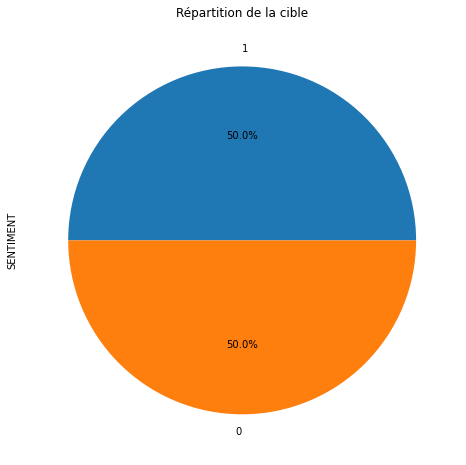

<IPython.core.display.Javascript object>

In [30]:
_ = (
    df_app["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

>## <span style='color:#1e488f' >Cr√©ation du DataFrame `Validation`</span>

In [31]:
VAL_SIZE = 35000

<IPython.core.display.Javascript object>

In [32]:
df_val, df_tweets = train_test_split(
    df_tweets, stratify=df_tweets["SENTIMENT"], train_size=VAL_SIZE, random_state=SEED
)

<IPython.core.display.Javascript object>

In [33]:
df_tweets = df_tweets.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [34]:
df_tweets

SENTIMENT                                              TWEET
0               1     @bethanie Yay! So, you're all visible again?  
1               0  Wishing night time wasn't the time when i thin...
2               1  What could be better than top ramen at 11 at n...
3               0     i am getting such sore stomach cramps atm..  x
4               1  Has got to go to work with a slight hangover g...
...           ...                                                ...
102995          1  Good Morning/Good Afternoon or Good Evening de...
102996          1  so tired, but not at the same time - not wanti...
102997          0          @MissFarrari I lost!!! Whomp whomp whomp 
102998          0  ARG!! IT'S 81 DEGREES! Why must it be so hot? ...
102999          0  @Tina8907 Why so heartbroken?   I know you don...

[103000 rows x 2 columns]

<IPython.core.display.Javascript object>

In [35]:
df_tweets["SENTIMENT"].value_counts()

1    51500
0    51500
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

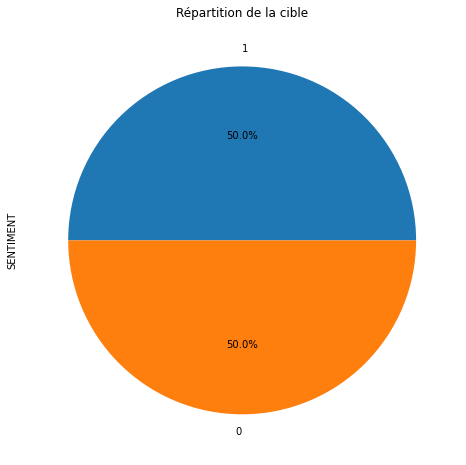

<IPython.core.display.Javascript object>

In [36]:
_ = (
    df_tweets["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

In [37]:
df_val = df_val.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [38]:
df_val

SENTIMENT                                              TWEET
0              1                     @OsmentEmily hey how are you? 
1              0  @KimBlairwitch - Not possible whilst live on t...
2              1               @NSpirit You have such a baby face! 
3              0                                  @zanyalves eu tb 
4              0  @aliceirene I do!!  I'm not in yo citaaay thou...
...          ...                                                ...
34995          1                             @dbldbl no not yet... 
34996          1                    @kyleandjackieo yea rove is on 
34997          1           InTheSpotlight with adri&amp;kent  yeee!
34998          1  @mileycyrus Miley!  Please tell everyone to bu...
34999          1  @Kytoo BOSA SI SWA!! haha that's a  STUDY DRIN...

[35000 rows x 2 columns]

<IPython.core.display.Javascript object>

#### Taille du jeu 'Validation'

In [39]:
len(df_val["SENTIMENT"])

35000

<IPython.core.display.Javascript object>

#### R√©partition du jeu 'Validation'

In [40]:
df_val["SENTIMENT"].value_counts()

1    17500
0    17500
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

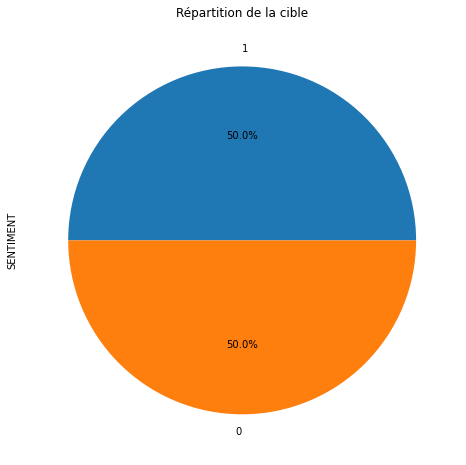

<IPython.core.display.Javascript object>

In [41]:
_ = (
    df_val["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

>## <span style='color:#1e488f' >Cr√©ation des DataFrame `Train` et `Test`</span>

In [42]:
df_train, df_test = train_test_split(
    df_tweets, stratify=df_tweets["SENTIMENT"], train_size=0.8, random_state=SEED
)

<IPython.core.display.Javascript object>

In [43]:
df_train = df_train.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [44]:
df_train

SENTIMENT                                              TWEET
0              1  @lauracowen hope you customised it with #ubunt...
1              0  Ultrasound shows something stuck in his intest...
2              0  @tinasays i forgot to take a pic  and my nickn...
3              0                    Coachella is coming to a close 
4              0  Finally got a new car!!! can't drive it yet th...
...          ...                                                ...
82395          0          Juuust woke up and there's nothing to do 
82396          1  Got some sweet shopping done in NY today at th...
82397          0  First time I'm going home early  sucks to b si...
82398          1  @recessionipes ...although in my poor post-col...
82399          0  @SkylarEntertain lol.....yes!!! cant seem to g...

[82400 rows x 2 columns]

<IPython.core.display.Javascript object>

#### Taille du jeu 'Train'

In [45]:
len(df_train["SENTIMENT"])

82400

<IPython.core.display.Javascript object>

#### R√©partition du jeu 'Train'

In [46]:
df_train["SENTIMENT"].value_counts()

1    41200
0    41200
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

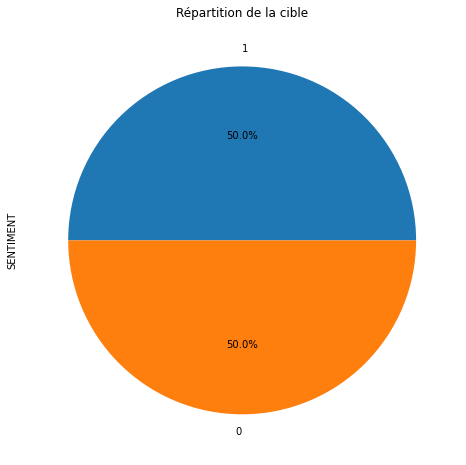

<IPython.core.display.Javascript object>

In [47]:
_ = (
    df_train["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

In [48]:
df_test = df_test.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [49]:
df_test

SENTIMENT                                              TWEET
0              1  Finish line for Team Alpha 'Allstars'.. Was a ...
1              1  @souljaboytellem &amp;nd what is it that your ...
2              1  @Llubyloo as long as that is all you are tweek...
3              1      @mileycyrus I agree just kick back and relax 
4              1  @jonsoklahomagrl you gonna stay up and wait fo...
...          ...                                                ...
20595          1  hey smile, i wont to get chineses eyed, cant w...
20596          0  http://twitpic.com/6ivh3 - I have my earphones...
20597          1  I'm looking forward to my 1st field hockey mat...
20598          0  @xohillary well I would love to hang out w/ yo...
20599          0  @DougEFreshbk he he heey ... how are you? watc...

[20600 rows x 2 columns]

<IPython.core.display.Javascript object>

#### Taille du jeu 'Test'

In [50]:
len(df_test["SENTIMENT"])

20600

<IPython.core.display.Javascript object>

#### R√©partition du jeu 'Test'

In [51]:
df_test["SENTIMENT"].value_counts()

1    10300
0    10300
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

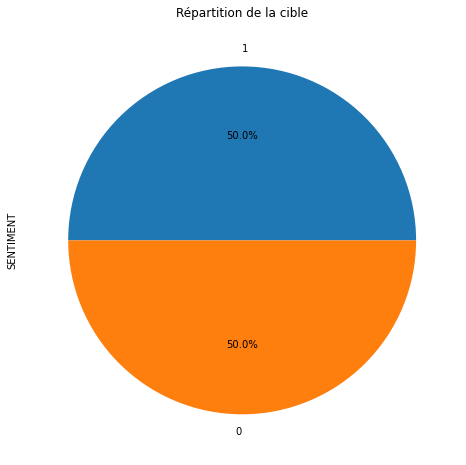

<IPython.core.display.Javascript object>

In [52]:
_ = (
    df_test["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

>## <span style='color:#1e488f' >Cr√©ation du DataFrame `Train_sample`</span>

In [53]:
SAMPLE_SIZE = 40000

<IPython.core.display.Javascript object>

In [54]:
df_train_sample, _ = train_test_split(
    df_train, stratify=df_train["SENTIMENT"], train_size=SAMPLE_SIZE, random_state=SEED
)

<IPython.core.display.Javascript object>

In [55]:
df_train_sample = df_train_sample.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [56]:
df_train_sample

SENTIMENT                                              TWEET
0              0  Ahhhhhh someone help me get picked up from her...
1              0  just found out an old friend of mine passed away 
2              1  @PhillyD I love your show! I've subscribed and...
3              0  @percussionpanda I hvent gotten a response yet...
4              0  He's on his way back to Keningau.. Hopefully h...
...          ...                                                ...
39995          0  @ MGiraudOfficial yes u are &amp; ur fans are ...
39996          0  @Ashalee22 Why did no one tell me there was go...
39997          1  @WilliamOrbit have you ever tried an Alesis An...
39998          1  @mgrmike Hi Mike!  I would love for you to dow...
39999          0  @Socialbees I throw dinner parties like I have...

[40000 rows x 2 columns]

<IPython.core.display.Javascript object>

#### Taille du jeu 'Train_sample'

In [57]:
len(df_train_sample["SENTIMENT"])

40000

<IPython.core.display.Javascript object>

#### R√©partition du jeu 'Train_sample'

In [58]:
df_train_sample["SENTIMENT"].value_counts()

0    20000
1    20000
Name: SENTIMENT, dtype: int64

<IPython.core.display.Javascript object>

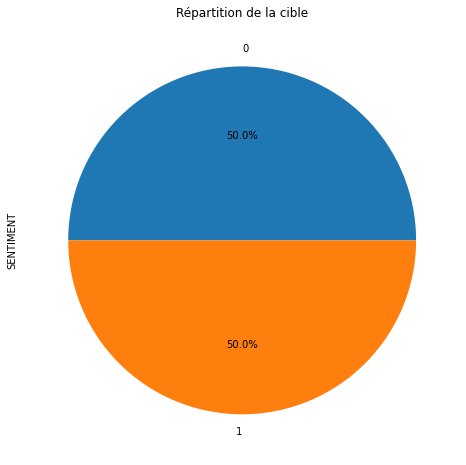

<IPython.core.display.Javascript object>

In [59]:
_ = (
    df_train_sample["SENTIMENT"]
    .value_counts()
    .plot(
        kind="pie", figsize=(10, 8), autopct="%1.1f%%", title="R√©partition de la cible"
    )
)

 # <span style='color:blue' id="section_2" >2. Preprocessing des donn√©es textuelles</span>
- Nous avons mis en place deux techniques de pr√©traitement :
    - Nettoyage des Tweets avec la librairie 'Preprocessor'
    - Lemmatization des Tweets avec la librairie 'SpaCy'

>## <span style='color:green' id="section_2_1" >2.1. Nettoyage des Tweets avec la librairie 'Preprocess'</span>

- Cette librairie Python est sp√©cialis√©e dans le pr√©traitement des Tweets
- Celle-ci permet de nettoyer les Tweets finement : on peut supprimer les √©l√©ments superflus des Tweets selon le besoin
- Nous avons essay√© deux types de nettoyage :
    - Nettoyage 'complet' : consiste √† enlever tous les √©l√©ments superflus
    - Nettoyage 'l√©ger' : consiste √† enlever uniquement les √©l√©ments de type URL et EMOJI

### PreProcessing 'Complet'

#### Exemple de nettoyage

In [60]:
tweetpreprocessor.clean("Preprocessor is #awesome üëç https://github.com/s/preprocessor")

'Preprocessor is'

<IPython.core.display.Javascript object>

#### PreProcessing DataFrame 'Train'

In [61]:
df_train["TWEET_PREPROCESSED"] = df_train["TWEET"].map(
    lambda text: tweetpreprocessor.clean(text)
)

<IPython.core.display.Javascript object>

In [62]:
df_train

SENTIMENT                                              TWEET  \
0              1  @lauracowen hope you customised it with #ubunt...   
1              0  Ultrasound shows something stuck in his intest...   
2              0  @tinasays i forgot to take a pic  and my nickn...   
3              0                    Coachella is coming to a close    
4              0  Finally got a new car!!! can't drive it yet th...   
...          ...                                                ...   
82395          0          Juuust woke up and there's nothing to do    
82396          1  Got some sweet shopping done in NY today at th...   
82397          0  First time I'm going home early  sucks to b si...   
82398          1  @recessionipes ...although in my poor post-col...   
82399          0  @SkylarEntertain lol.....yes!!! cant seem to g...   

                                      TWEET_PREPROCESSED  
0      hope you customised it with / wallpapers and l...  
1      Ultrasound shows something stuck in his intest...  
2      i forgot to take a pic and my nickname was rob...  
3                         Coachella is coming to a close  
4      Finally got a new car!!! can't drive it yet th...  
...                                                  ...  
82395           Juuust woke up and there's nothing to do  
82396  Got some sweet shopping done in NY today at th...  
82397  First time I'm going home early sucks to b sin...  
82398  ...although in my poor post-college days I has...  
82399  lol.....yes!!! cant seem to get a profile pict...  

[82400 rows x 3 columns]

<IPython.core.display.Javascript object>

In [63]:
X_train = df_train["TWEET_PREPROCESSED"].values
y_train = df_train["SENTIMENT"].values

<IPython.core.display.Javascript object>

In [64]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

X_train Shape: (82400,)
y_train Shape: (82400,)


<IPython.core.display.Javascript object>

In [65]:
X_train

array(['hope you customised it with / wallpapers and left podcasts on the desktop Never hurts to advertise',
       'Ultrasound shows something stuck in his intestines. Time for surgery.',
       'i forgot to take a pic and my nickname was robinsprkl. hahahaha',
       ...,
       "First time I'm going home early sucks to b single no one to call",
       '...although in my poor post-college days I has a suite of dried out cheese &amp; limp veggies recipes. Nasty stuff.',
       'lol.....yes!!! cant seem to get a profile picture up tho how are you?'],
      dtype=object)

<IPython.core.display.Javascript object>

In [66]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

<IPython.core.display.Javascript object>

#### Sauvegarde du DataFrame 'Train'

In [67]:
df_train.to_csv("airparadis_train_dataset.csv", index=False)

<IPython.core.display.Javascript object>

#### PreProcessing DataFrame 'Train_sample'

In [68]:
df_train_sample["TWEET_PREPROCESSED"] = df_train_sample["TWEET"].map(
    lambda text: tweetpreprocessor.clean(text)
)

<IPython.core.display.Javascript object>

In [69]:
df_train_sample

SENTIMENT                                              TWEET  \
0              0  Ahhhhhh someone help me get picked up from her...   
1              0  just found out an old friend of mine passed away    
2              1  @PhillyD I love your show! I've subscribed and...   
3              0  @percussionpanda I hvent gotten a response yet...   
4              0  He's on his way back to Keningau.. Hopefully h...   
...          ...                                                ...   
39995          0  @ MGiraudOfficial yes u are &amp; ur fans are ...   
39996          0  @Ashalee22 Why did no one tell me there was go...   
39997          1  @WilliamOrbit have you ever tried an Alesis An...   
39998          1  @mgrmike Hi Mike!  I would love for you to dow...   
39999          0  @Socialbees I throw dinner parties like I have...   

                                      TWEET_PREPROCESSED  
0      Ahhhhhh someone help me get picked up from her...  
1       just found out an old friend of mine passed away  
2      I love your show! I've subscribed and followin...  
3      I hvent gotten a response yet I dnt think I wi...  
4      He's on his way back to Keningau.. Hopefully h...  
...                                                  ...  
39995  MGiraudOfficial yes u are &amp; ur fans are ex...  
39996  Why did no one tell me there was going to be a...  
39997        have you ever tried an Alesis Andromeda A6?  
39998  Hi Mike! I would love for you to download my c...  
39999  I throw dinner parties like I have space for b...  

[40000 rows x 3 columns]

<IPython.core.display.Javascript object>

In [70]:
X_train_sample = df_train_sample["TWEET_PREPROCESSED"].values
y_train_sample = df_train_sample["SENTIMENT"].values

<IPython.core.display.Javascript object>

In [71]:
print("X_train_sample Shape:", X_train_sample.shape)
print("y_train_sample Shape:", y_train_sample.shape)

X_train_sample Shape: (40000,)
y_train_sample Shape: (40000,)


<IPython.core.display.Javascript object>

In [72]:
X_train_sample

array(["Ahhhhhh someone help me get picked up from here! No one's picking up the phone",
       'just found out an old friend of mine passed away',
       "I love your show! I've subscribed and following your tweets. Can't wait to see more",
       ..., 'have you ever tried an Alesis Andromeda A6?',
       "Hi Mike! I would love for you to download my cd, &quot;bend&quot;, for $4 You'll luv it!",
       'I throw dinner parties like I have space for but comfortably can only fit .'],
      dtype=object)

<IPython.core.display.Javascript object>

In [73]:
y_train_sample

array([0, 0, 1, ..., 1, 1, 0])

<IPython.core.display.Javascript object>

##### X_train_sample_notpreprocessed : version avec tweets non pr√© process√©s pour comparaison des r√©sulats

In [74]:
X_train_sample_notpreprocessed = df_train_sample["TWEET"].values

<IPython.core.display.Javascript object>

#### PreProcessing DataFrame 'Test'

In [75]:
df_test["TWEET_PREPROCESSED"] = df_test["TWEET"].map(
    lambda text: tweetpreprocessor.clean(text)
)

<IPython.core.display.Javascript object>

In [76]:
df_test

SENTIMENT                                              TWEET  \
0              1  Finish line for Team Alpha 'Allstars'.. Was a ...   
1              1  @souljaboytellem &amp;nd what is it that your ...   
2              1  @Llubyloo as long as that is all you are tweek...   
3              1      @mileycyrus I agree just kick back and relax    
4              1  @jonsoklahomagrl you gonna stay up and wait fo...   
...          ...                                                ...   
20595          1  hey smile, i wont to get chineses eyed, cant w...   
20596          0  http://twitpic.com/6ivh3 - I have my earphones...   
20597          1  I'm looking forward to my 1st field hockey mat...   
20598          0  @xohillary well I would love to hang out w/ yo...   
20599          0  @DougEFreshbk he he heey ... how are you? watc...   

                                      TWEET_PREPROCESSED  
0      Finish line for Team Alpha 'Allstars'.. Was a ...  
1            &amp;nd what is it that your doin Dre?? lol  
2            as long as that is all you are tweeking Lin  
3                       I agree just kick back and relax  
4             you gonna stay up and wait for him tonight  
...                                                  ...  
20595  hey smile, i wont to get chineses eyed, cant w...  
20596  - I have my earphones back! ah... the depth of...  
20597   I'm looking forward to my st field hockey match.  
20598  well I would love to hang out w/ you! Only pro...  
20599  he he heey ... how are you? watching MTV... ar...  

[20600 rows x 3 columns]

<IPython.core.display.Javascript object>

In [77]:
X_test = df_test["TWEET_PREPROCESSED"].values
y_test = df_test["SENTIMENT"].values

<IPython.core.display.Javascript object>

In [78]:
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_test Shape: (20600,)
y_test Shape: (20600,)


<IPython.core.display.Javascript object>

In [79]:
X_test

array(["Finish line for Team Alpha 'Allstars'.. Was a great day and good to in the winning company team",
       '&amp;nd what is it that your doin Dre?? lol',
       'as long as that is all you are tweeking Lin', ...,
       "I'm looking forward to my st field hockey match.",
       "well I would love to hang out w/ you! Only problem is right now I don't have a car since I am just visitin",
       "he he heey ... how are you? watching MTV... aren't they going bankrupt? at least vh1 still going... &lt;-bored as u can see."],
      dtype=object)

<IPython.core.display.Javascript object>

In [80]:
y_test

array([1, 1, 1, ..., 1, 0, 0])

<IPython.core.display.Javascript object>

#### PreProcessing DataFrame 'Validation'

In [81]:
df_val["TWEET_PREPROCESSED"] = df_val["TWEET"].map(
    lambda text: tweetpreprocessor.clean(text)
)

<IPython.core.display.Javascript object>

In [82]:
df_val

SENTIMENT                                              TWEET  \
0              1                     @OsmentEmily hey how are you?    
1              0  @KimBlairwitch - Not possible whilst live on t...   
2              1               @NSpirit You have such a baby face!    
3              0                                  @zanyalves eu tb    
4              0  @aliceirene I do!!  I'm not in yo citaaay thou...   
...          ...                                                ...   
34995          1                             @dbldbl no not yet...    
34996          1                    @kyleandjackieo yea rove is on    
34997          1           InTheSpotlight with adri&amp;kent  yeee!   
34998          1  @mileycyrus Miley!  Please tell everyone to bu...   
34999          1  @Kytoo BOSA SI SWA!! haha that's a  STUDY DRIN...   

                                      TWEET_PREPROCESSED  
0                                       hey how are you?  
1      - Not possible whilst live on the show i'm afraid  
2                             You have such a baby face!  
3                                                  eu tb  
4                   I do!! I'm not in yo citaaay though.  
...                                                  ...  
34995                                      no not yet...  
34996                                     yea rove is on  
34997            InTheSpotlight with adri&amp;kent yeee!  
34998  Miley! Please tell everyone to buy Girls Aloud...  
34999  BOSA SI SWA!! haha that's a STUDY DRINK! haha ...  

[35000 rows x 3 columns]

<IPython.core.display.Javascript object>

In [83]:
X_val = df_val["TWEET_PREPROCESSED"].values
y_val = df_val["SENTIMENT"].values

<IPython.core.display.Javascript object>

In [84]:
print("X_val Shape:", X_val.shape)
print("y_val Shape:", y_val.shape)

X_val Shape: (35000,)
y_val Shape: (35000,)


<IPython.core.display.Javascript object>

In [85]:
X_val

array(['hey how are you?',
       "- Not possible whilst live on the show i'm afraid",
       'You have such a baby face!', ...,
       'InTheSpotlight with adri&amp;kent yeee!',
       'Miley! Please tell everyone to buy Girls Aloud Untouchable! Every tweet helps ty',
       "BOSA SI SWA!! haha that's a STUDY DRINK! haha btw! good luck with your final tomorrow dude!"],
      dtype=object)

<IPython.core.display.Javascript object>

In [86]:
y_val

array([1, 0, 1, ..., 1, 1, 1])

<IPython.core.display.Javascript object>

##### X_val_notpreprocessed : version avec tweets non pr√©process√©s pour comparaison des r√©sulats

In [87]:
X_val_notpreprocessed = df_val["TWEET"].values

<IPython.core.display.Javascript object>

#### PreProcessing DataFrame 'Approach'

In [88]:
df_app["TWEET_PREPROCESSED"] = df_app["TWEET"].map(
    lambda text: tweetpreprocessor.clean(text)
)

<IPython.core.display.Javascript object>

In [89]:
df_app

SENTIMENT                                              TWEET  \
0             1                              @seanlb Got them all    
1             0              On my way in to the office...raining    
2             0                      going to my cousin's funeral    
3             1                                     @ShannonRenee    
4             0  Downloading the final iPhone 3.0 SDK from Appl...   
...         ...                                                ...   
1995          1  haha I know all the conversations and I could ...   
1996          0  Missing my phone, which is at the bottom of th...   
1997          0        Please noooo...Dave Gahan has cancer scare    
1998          0  @ravenme in NYC, you don't have to shoot yours...   
1999          0  Going to the city to babysit for 11 hours... A...   

                                     TWEET_PREPROCESSED  
0                                          Got them all  
1                  On my way in to the office...raining  
2                          going to my cousin's funeral  
3                                                        
4     Downloading the final iPhone SDK from Apple at...  
...                                                 ...  
1995  haha I know all the conversations and I could ...  
1996  Missing my phone, which is at the bottom of th...  
1997         Please noooo...Dave Gahan has cancer scare  
1998  in NYC, you don't have to shoot yourself -- pl...  
1999  Going to the city to babysit for hours... At :...  

[2000 rows x 3 columns]

<IPython.core.display.Javascript object>

In [90]:
X_app = df_app["TWEET_PREPROCESSED"].values
y_app = df_app["SENTIMENT"].values

<IPython.core.display.Javascript object>

In [91]:
print("X_app Shape:", X_app.shape)
print("y_app Shape:", y_app.shape)

X_app Shape: (2000,)
y_app Shape: (2000,)


<IPython.core.display.Javascript object>

In [92]:
X_app

array(['Got them all', 'On my way in to the office...raining',
       "going to my cousin's funeral", ...,
       'Please noooo...Dave Gahan has cancer scare',
       "in NYC, you don't have to shoot yourself -- plenty of other folks willing to do it for you.",
       'Going to the city to babysit for hours... At :45 in the morning.'],
      dtype=object)

<IPython.core.display.Javascript object>

In [93]:
y_app

array([1, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>

#### Sauvegarde du DataFrame 'Approach'

In [94]:
df_app.to_csv("airparadis_approach_dataset.csv", index=False)

<IPython.core.display.Javascript object>

### PreProcessing 'L√©ger'

In [95]:
tweetpreprocessor.set_options(tweetpreprocessor.OPT.URL, tweetpreprocessor.OPT.EMOJI)

<IPython.core.display.Javascript object>

In [96]:
tweetpreprocessor.clean("Preprocessor is #awesome üëç https://github.com/s/preprocessor")

'Preprocessor is #awesome'

<IPython.core.display.Javascript object>

In [97]:
df_train_sample["TWEET_LIGHT_PREPROCESSED"] = df_train_sample["TWEET"].apply(
    lambda text: tweetpreprocessor.clean(text)
)

<IPython.core.display.Javascript object>

In [98]:
df_train_sample

SENTIMENT                                              TWEET  \
0              0  Ahhhhhh someone help me get picked up from her...   
1              0  just found out an old friend of mine passed away    
2              1  @PhillyD I love your show! I've subscribed and...   
3              0  @percussionpanda I hvent gotten a response yet...   
4              0  He's on his way back to Keningau.. Hopefully h...   
...          ...                                                ...   
39995          0  @ MGiraudOfficial yes u are &amp; ur fans are ...   
39996          0  @Ashalee22 Why did no one tell me there was go...   
39997          1  @WilliamOrbit have you ever tried an Alesis An...   
39998          1  @mgrmike Hi Mike!  I would love for you to dow...   
39999          0  @Socialbees I throw dinner parties like I have...   

                                      TWEET_PREPROCESSED  \
0      Ahhhhhh someone help me get picked up from her...   
1       just found out an old friend of mine passed away   
2      I love your show! I've subscribed and followin...   
3      I hvent gotten a response yet I dnt think I wi...   
4      He's on his way back to Keningau.. Hopefully h...   
...                                                  ...   
39995  MGiraudOfficial yes u are &amp; ur fans are ex...   
39996  Why did no one tell me there was going to be a...   
39997        have you ever tried an Alesis Andromeda A6?   
39998  Hi Mike! I would love for you to download my c...   
39999  I throw dinner parties like I have space for b...   

                                TWEET_LIGHT_PREPROCESSED  
0      Ahhhhhh someone help me get picked up from her...  
1       just found out an old friend of mine passed away  
2      @PhillyD I love your show! I've subscribed and...  
3      @percussionpanda I hvent gotten a response yet...  
4      He's on his way back to Keningau.. Hopefully h...  
...                                                  ...  
39995  @ MGiraudOfficial yes u are &amp; ur fans are ...  
39996  @Ashalee22 Why did no one tell me there was go...  
39997  @WilliamOrbit have you ever tried an Alesis An...  
39998  @mgrmike Hi Mike! I would love for you to down...  
39999  @Socialbees I throw dinner parties like I have...  

[40000 rows x 4 columns]

<IPython.core.display.Javascript object>

In [99]:
X_train_sample_lightpreprocessed = df_train_sample["TWEET_LIGHT_PREPROCESSED"].values

<IPython.core.display.Javascript object>

In [100]:
df_val["TWEET_LIGHT_PREPROCESSED"] = df_val["TWEET"].map(
    lambda text: tweetpreprocessor.clean(text)
)

<IPython.core.display.Javascript object>

In [101]:
df_val

SENTIMENT                                              TWEET  \
0              1                     @OsmentEmily hey how are you?    
1              0  @KimBlairwitch - Not possible whilst live on t...   
2              1               @NSpirit You have such a baby face!    
3              0                                  @zanyalves eu tb    
4              0  @aliceirene I do!!  I'm not in yo citaaay thou...   
...          ...                                                ...   
34995          1                             @dbldbl no not yet...    
34996          1                    @kyleandjackieo yea rove is on    
34997          1           InTheSpotlight with adri&amp;kent  yeee!   
34998          1  @mileycyrus Miley!  Please tell everyone to bu...   
34999          1  @Kytoo BOSA SI SWA!! haha that's a  STUDY DRIN...   

                                      TWEET_PREPROCESSED  \
0                                       hey how are you?   
1      - Not possible whilst live on the show i'm afraid   
2                             You have such a baby face!   
3                                                  eu tb   
4                   I do!! I'm not in yo citaaay though.   
...                                                  ...   
34995                                      no not yet...   
34996                                     yea rove is on   
34997            InTheSpotlight with adri&amp;kent yeee!   
34998  Miley! Please tell everyone to buy Girls Aloud...   
34999  BOSA SI SWA!! haha that's a STUDY DRINK! haha ...   

                                TWEET_LIGHT_PREPROCESSED  
0                          @OsmentEmily hey how are you?  
1      @KimBlairwitch - Not possible whilst live on t...  
2                    @NSpirit You have such a baby face!  
3                                       @zanyalves eu tb  
4       @aliceirene I do!! I'm not in yo citaaay though.  
...                                                  ...  
34995                              @dbldbl no not yet...  
34996                     @kyleandjackieo yea rove is on  
34997            InTheSpotlight with adri&amp;kent yeee!  
34998  @mileycyrus Miley! Please tell everyone to buy...  
34999  @Kytoo BOSA SI SWA!! haha that's a STUDY DRINK...  

[35000 rows x 4 columns]

<IPython.core.display.Javascript object>

In [102]:
X_val_lightpreprocessed = df_val["TWEET_LIGHT_PREPROCESSED"].values

<IPython.core.display.Javascript object>

>## <span style='color:green' id="section_2_2" >2.2. Lemmatization des Tweets avec la librairie `SpaCy`</span>

In [103]:
def lemmatization(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return " ".join(tokens)

<IPython.core.display.Javascript object>

In [104]:
df_train_sample["TWEET_LEMMATIZED"] = df_train_sample["TWEET_PREPROCESSED"].apply(
    lambda text: lemmatization(text)
)

<IPython.core.display.Javascript object>

In [105]:
df_train_sample

SENTIMENT                                              TWEET  \
0              0  Ahhhhhh someone help me get picked up from her...   
1              0  just found out an old friend of mine passed away    
2              1  @PhillyD I love your show! I've subscribed and...   
3              0  @percussionpanda I hvent gotten a response yet...   
4              0  He's on his way back to Keningau.. Hopefully h...   
...          ...                                                ...   
39995          0  @ MGiraudOfficial yes u are &amp; ur fans are ...   
39996          0  @Ashalee22 Why did no one tell me there was go...   
39997          1  @WilliamOrbit have you ever tried an Alesis An...   
39998          1  @mgrmike Hi Mike!  I would love for you to dow...   
39999          0  @Socialbees I throw dinner parties like I have...   

                                      TWEET_PREPROCESSED  \
0      Ahhhhhh someone help me get picked up from her...   
1       just found out an old friend of mine passed away   
2      I love your show! I've subscribed and followin...   
3      I hvent gotten a response yet I dnt think I wi...   
4      He's on his way back to Keningau.. Hopefully h...   
...                                                  ...   
39995  MGiraudOfficial yes u are &amp; ur fans are ex...   
39996  Why did no one tell me there was going to be a...   
39997        have you ever tried an Alesis Andromeda A6?   
39998  Hi Mike! I would love for you to download my c...   
39999  I throw dinner parties like I have space for b...   

                                TWEET_LIGHT_PREPROCESSED  \
0      Ahhhhhh someone help me get picked up from her...   
1       just found out an old friend of mine passed away   
2      @PhillyD I love your show! I've subscribed and...   
3      @percussionpanda I hvent gotten a response yet...   
4      He's on his way back to Keningau.. Hopefully h...   
...                                                  ...   
39995  @ MGiraudOfficial yes u are &amp; ur fans are ...   
39996  @Ashalee22 Why did no one tell me there was go...   
39997  @WilliamOrbit have you ever tried an Alesis An...   
39998  @mgrmike Hi Mike! I would love for you to down...   
39999  @Socialbees I throw dinner parties like I have...   

                                        TWEET_LEMMATIZED  
0      Ahhhhhh someone help I get pick up from here !...  
1          just find out an old friend of mine pass away  
2      I love your show ! I 've subscribe and follow ...  
3      I hvent get a response yet I dnt think I will ...  
4      he be on his way back to Keningau .. hopefully...  
...                                                  ...  
39995  MGiraudOfficial yes u be & amp ; ur fan be exc...  
39996  why do no one tell I there be go to be a seque...  
39997         have you ever try an Alesis Andromeda A6 ?  
39998  hi Mike ! I would love for you to download my ...  
39999  I throw dinner party like I have space for but...  

[40000 rows x 5 columns]

<IPython.core.display.Javascript object>

In [106]:
X_train_sample_lemma = df_train_sample["TWEET_LEMMATIZED"].values

<IPython.core.display.Javascript object>

In [107]:
X_train_sample_lemma

array(["Ahhhhhh someone help I get pick up from here ! no one 's pick up the phone",
       'just find out an old friend of mine pass away',
       "I love your show ! I 've subscribe and follow your tweet . can not wait to see more",
       ..., 'have you ever try an Alesis Andromeda A6 ?',
       'hi Mike ! I would love for you to download my cd , & quot;bend&quot ; , for $ 4 you will luv it !',
       'I throw dinner party like I have space for but comfortably can only fit .'],
      dtype=object)

<IPython.core.display.Javascript object>

In [108]:
df_val["TWEET_LEMMATIZED"] = df_val["TWEET_PREPROCESSED"].map(
    lambda text: lemmatization(text)
)

<IPython.core.display.Javascript object>

In [109]:
X_val_lemma = df_val["TWEET_LEMMATIZED"].values

<IPython.core.display.Javascript object>

In [110]:
X_val_lemma

array(['hey how be you ?',
       '- not possible whilst live on the show I be afraid',
       'you have such a baby face !', ...,
       'InTheSpotlight with adri&amp;kent yeee !',
       'Miley ! please tell everyone to buy Girls Aloud Untouchable ! every tweet help ty',
       'BOSA SI SWA ! ! haha that be a STUDY DRINK ! haha btw ! good luck with your final tomorrow dude !'],
      dtype=object)

<IPython.core.display.Javascript object>

### Fonction de suppression manuelles des : hashtags, @ and url
##### Remarque :
- On peut √©galement effectuer un pr√©processing 'manuel' des tweets gr√¢ce √† la fonction ci-dessous qui permet de supprimer les √©lements li√©s √† la liste 'character_list'

In [111]:
def remove_word_with_chararcter(text, character_list):
    # Remove words in a text that contains a char from the list.
    text = text.split()
    result = [
        element
        for element in text
        if all(character not in element for character in character_list)
    ]
    text_cleaned = " ".join(result)
    return text_cleaned

<IPython.core.display.Javascript object>

In [112]:
character_list = ["@", "#", "http", "www", "/"]

<IPython.core.display.Javascript object>

 # <span style='color:blue' id="section_3" >3. Approche Machine Learning classique = mod√®le de r√©f√©rence</span>

 - Choix de la m√©trique d'√©valuation
 - Repr√©sentation des donn√©es textuelles : TF-IDF
 - Mod√©lisation : Regression logistique
 - Evaluation

- Cette approche va nous permettre de mettre en place un mod√®le basique de r√©f√©rence qui nous servira de comparaison pour √©valuer la performance des mod√®les plus complexes bas√©s sur l'approche Deep Learning (R√©seaux de neurones)

>## <span style='color:green' id="section_3_1" >3.1. Choix de la m√©trique d'√©valuation</span>
- Nous avons choisi la m√©trique **Accuracy**, car : 
    - Les donn√©es sont √©qulibr√©es
    - Il faut d√©terminer les sentiments corrects √† √©galit√©, qu'ils soient positifs ou n√©gatifs

>## <span style='color:green' id="section_3_2" >3.2. Mod√©lisation des Tweets nettoy√©s mais non lemmatis√©s</span>

>>## <span style='color:#D15C22' id="section_3_2_1" >3.2.1 Repr√©sentation des donn√©es textuelles : TF-IDF</span>

In [113]:
tfidf_model = TfidfVectorizer()

<IPython.core.display.Javascript object>

In [114]:
tfidf_skl = tfidf_model.fit_transform(X_train_sample)

<IPython.core.display.Javascript object>

In [115]:
tfidf_skl

<40000x30510 sparse matrix of type '<class 'numpy.float64'>'
	with 447208 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>

#### Taille du vocabulaire

In [116]:
len(tfidf_model.vocabulary_)

30510

<IPython.core.display.Javascript object>

#### Vocabulaire

In [117]:
tfidf_model.vocabulary_

{'ahhhhhh': 780,
 'someone': 24417,
 'help': 11979,
 'me': 16399,
 'get': 10570,
 'picked': 19802,
 'up': 28083,
 'from': 10105,
 'here': 12021,
 'no': 18119,
 'one': 18684,
 'picking': 19806,
 'the': 26416,
 'phone': 19740,
 'just': 14079,
 'found': 9897,
 'out': 18948,
 'an': 1197,
 'old': 18624,
 'friend': 10063,
 'of': 18508,
 'mine': 16811,
 'passed': 19363,
 'away': 2000,
 'love': 15640,
 'your': 30199,
 'show': 23666,
 've': 28328,
 'subscribed': 25404,
 'and': 1226,
 'following': 9773,
 'tweets': 27532,
 'can': 4240,
 'wait': 28745,
 'to': 26840,
 'see': 23120,
 'more': 17184,
 'hvent': 12714,
 'gotten': 10969,
 'response': 21969,
 'yet': 30119,
 'dnt': 7451,
 'think': 26507,
 'will': 29379,
 'now': 18303,
 'especially': 8675,
 'with': 29490,
 'all': 967,
 'stuff': 25345,
 'his': 12182,
 'dad': 6484,
 'going': 10839,
 'on': 18681,
 'poor': 20226,
 'thing': 26499,
 'he': 11800,
 'way': 28948,
 'back': 2147,
 'keningau': 14289,
 'hopefully': 12398,
 'reach': 21440,
 'there': 2645

<IPython.core.display.Javascript object>

>>## <span style='color:#D15C22' id="section_3_2_2" >3.2.2 Mod√©lisation : Regression logistique</span>

In [118]:
log_reg_model = LogisticRegression(random_state=SEED)

<IPython.core.display.Javascript object>

In [119]:
log_tfidf_model = Pipeline([("vect", tfidf_model), ("clf", log_reg_model)])

<IPython.core.display.Javascript object>

In [120]:
log_tfidf_model.fit(X_train_sample, y_train_sample)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(random_state=0))])

<IPython.core.display.Javascript object>

>>## <span style='color:#D15C22' id="section_3_2_3" >3.2.3 Evaluation</span>
### <span style='color:#6A00B3 '>Accuracy score :</span>

In [121]:
log_tfidf_model_accuracy = log_tfidf_model.score(X_val, y_val)

<IPython.core.display.Javascript object>

In [122]:
print(f"Accuracy score = {log_tfidf_model_accuracy:.3f}")

Accuracy score = 0.774


<IPython.core.display.Javascript object>

### <span style='color:#6A00B3 '> Pr√©dictions :</span>

In [123]:
predicted_labels = log_tfidf_model.predict(X_val)
predicted_labels

array([1, 0, 0, ..., 1, 1, 1])

<IPython.core.display.Javascript object>

### <span style='color:#6A00B3 '>Matrice de confusion :</span>

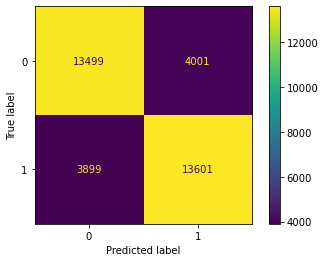

<IPython.core.display.Javascript object>

In [124]:
cm = confusion_matrix(y_val, predicted_labels)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

### <span style='color:#6A00B3 '>Rapport de classifiction :</span>

In [125]:
print(classification_report(y_val, predicted_labels))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     17500
           1       0.77      0.78      0.77     17500

    accuracy                           0.77     35000
   macro avg       0.77      0.77      0.77     35000
weighted avg       0.77      0.77      0.77     35000



<IPython.core.display.Javascript object>

>## <span style='color:green' id="section_3_3" >3.3. Mod√©lisation des Tweets nettoy√©s et lemmatis√©s</span>

>>## <span style='color:#D15C22' id="section_3_3_1" >3.3.1 Repr√©sentation des donn√©es textuelles : TF-IDF</span>

In [126]:
tfidf_lemma_model = TfidfVectorizer()

<IPython.core.display.Javascript object>

In [127]:
tfidf_lemma_skl = tfidf_lemma_model.fit_transform(X_train_sample_lemma)

<IPython.core.display.Javascript object>

In [128]:
tfidf_lemma_skl

<40000x27066 sparse matrix of type '<class 'numpy.float64'>'
	with 447085 stored elements in Compressed Sparse Row format>

<IPython.core.display.Javascript object>

#### Taille du vocabulaire

In [129]:
len(tfidf_lemma_model.vocabulary_)

27066

<IPython.core.display.Javascript object>

#### Vocabulaire

In [130]:
tfidf_lemma_model.vocabulary_

{'ahhhhhh': 691,
 'someone': 21662,
 'help': 10590,
 'get': 9316,
 'pick': 17752,
 'up': 24856,
 'from': 8893,
 'here': 10630,
 'no': 16238,
 'one': 16759,
 'the': 23359,
 'phone': 17701,
 'just': 12518,
 'find': 8345,
 'out': 17004,
 'an': 1079,
 'old': 16701,
 'friend': 8854,
 'of': 16595,
 'mine': 15022,
 'pass': 17369,
 'away': 1797,
 'love': 13931,
 'your': 26762,
 'show': 21027,
 've': 25078,
 'subscribe': 22483,
 'and': 1106,
 'follow': 8585,
 'tweet': 24302,
 'can': 3778,
 'not': 16369,
 'wait': 25458,
 'to': 23728,
 'see': 20559,
 'more': 15368,
 'hvent': 11258,
 'response': 19555,
 'yet': 26688,
 'dnt': 6561,
 'think': 23441,
 'will': 26017,
 'now': 16405,
 'especially': 7646,
 'with': 26112,
 'all': 865,
 'stuff': 22435,
 'his': 10779,
 'dad': 5711,
 'go': 9519,
 'on': 16756,
 'poor': 18116,
 'thing': 23433,
 'he': 10426,
 'be': 2267,
 'way': 25634,
 'back': 1941,
 'keningau': 12717,
 'hopefully': 10979,
 'reach': 19151,
 'there': 23394,
 'safely': 20134,
 'feel': 8179,
 're

<IPython.core.display.Javascript object>

>>## <span style='color:#D15C22' id="section_3_3_2" >3.3.2 Mod√©lisation : Regression logistique</span>

In [131]:
log_reg_lemma_model = LogisticRegression(random_state=SEED)

<IPython.core.display.Javascript object>

In [132]:
log_tfidf_lemma_model = Pipeline(
    [("vect", tfidf_lemma_model), ("clf", log_reg_lemma_model)]
)

<IPython.core.display.Javascript object>

In [133]:
log_tfidf_lemma_model.fit(X_train_sample_lemma, y_train_sample)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', LogisticRegression(random_state=0))])

<IPython.core.display.Javascript object>

>>## <span style='color:#D15C22' id="section_3_3_3" >3.3.3  Evaluation</span>

### <span style='color:#6A00B3 '>Accuracy score :</span>

In [134]:
log_tfidf_lemma_model_accuracy = log_tfidf_lemma_model.score(X_val_lemma, y_val)

<IPython.core.display.Javascript object>

In [135]:
print(f"Accuracy score = {log_tfidf_lemma_model_accuracy:.4f}")

Accuracy score = 0.7714


<IPython.core.display.Javascript object>

### <span style='color:#6A00B3 '>Pr√©dictions :</span>

In [136]:
predicted_labels_lemma = log_tfidf_lemma_model.predict(X_val_lemma)
predicted_labels_lemma

array([1, 0, 1, ..., 1, 1, 1])

<IPython.core.display.Javascript object>

### <span style='color:#6A00B3 '>Matrice de confusion :</span>

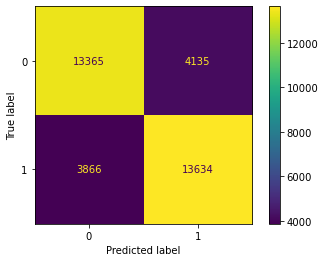

<IPython.core.display.Javascript object>

In [137]:
cm = confusion_matrix(y_val, predicted_labels_lemma)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

### <span style='color:#6A00B3 '>Rapport de classifiction :</span>

In [138]:
print(classification_report(y_val, predicted_labels_lemma))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     17500
           1       0.77      0.78      0.77     17500

    accuracy                           0.77     35000
   macro avg       0.77      0.77      0.77     35000
weighted avg       0.77      0.77      0.77     35000



<IPython.core.display.Javascript object>

### <span style='color:#019DA0'>Synth√®se :</span>
- La lemmatisation n'am√©liore pas les r√©sultats : l'accuracy avec les Tweets lemmatises (0.771) est l√©g√®rement inf√©rieure √† l'accuracy avec les Tweets non lemmatises (0.774) => Le nettoyage avec la librairie tweet-preprocessor est assez performant.
- Cette approche nous a permis de mettre en place un mod√®le basique de r√©f√©rence qui nous servira de comparaison pour √©valuer la performance des mod√®les plus complexes bas√©s sur l'approche Deep Learning (R√©seaux de neurones).
- L'accuracy du mod√®le de r√©f√©rence est de **0.774**.

 # <span style='color:blue' id="section_4" >4. Approche Deep Learning = mod√®les avanc√©s</span>

>## <span style='color:green' id="section_4_1" >4.1. Repr√©sentation des donn√©es textuelles : Words Embeddings</span>

- Nous allons utiliser un mod√®le de type GloVe classique **pr√©entra√Æn√©**.

>>## <span style='color:#D15C22' id="section_4_1_1" >4.1.1 Mod√®le GloVe 'classique' pr√©entra√Æn√©</span>

#### Chargement du mod√®le : GloVe word embedding 6-billion and 300-dimensional text
- Construction du dictionnaire contenant chaque mot (cl√©) et son vector embedding (valeur)
- Taille des vecteurs GloVe = 300

In [139]:
glove_embeddings_index = {}

with open(path_dataset + "glove.6B.300d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        glove_embeddings_index[word] = coefs
    f.close()

print("Found %s word vectors." % len(glove_embeddings_index))

Found 400000 word vectors.


<IPython.core.display.Javascript object>

#### Taille du dictionnaire du mod√®le GloVe

In [140]:
len(glove_embeddings_index)

400000

<IPython.core.display.Javascript object>

#### Taille des vecteurs de mots du mod√®le GloVe

In [141]:
len(glove_embeddings_index["really"])

300

<IPython.core.display.Javascript object>

#### Exemple de vecteur de mot

In [142]:
glove_embeddings_index["really"]

array([ 0.076563 ,  0.032454 , -0.030982 , -0.018969 ,  0.23847  ,
        0.0068223, -0.10712  ,  0.071476 ,  0.09306  , -2.0062   ,
        0.36672  , -0.26163  ,  0.079668 ,  0.29697  , -0.39083  ,
       -0.11541  , -0.12517  , -0.076881 ,  0.10232  ,  0.49871  ,
        0.39728  ,  0.84999  ,  0.26828  , -0.16472  , -0.2239   ,
        0.013359 ,  0.20367  , -0.56752  ,  0.090597 , -0.14017  ,
       -0.091364 ,  0.30727  , -0.79903  , -0.33384  , -1.5976   ,
        0.51233  , -0.062729 ,  0.23001  ,  0.17198  , -0.0037873,
        0.11718  , -0.57576  ,  0.091715 , -0.38781  ,  0.11705  ,
        0.2184   ,  0.24388  , -0.10923  ,  0.16841  ,  0.14458  ,
        0.20001  , -0.0246   , -0.13881  , -0.13668  , -0.52192  ,
        0.49043  ,  0.18459  ,  0.19118  ,  0.40137  ,  0.10437  ,
        0.42105  , -0.16498  ,  0.092319 ,  0.55078  , -0.23365  ,
       -0.014262 ,  0.019687 , -0.045058 , -0.1224   ,  0.013286 ,
       -0.31065  , -0.23751  , -0.19253  ,  0.73717  ,  0.1492

<IPython.core.display.Javascript object>

#### Construction du vocabulaire pour le corpus d'entrainement

In [143]:
oov_tk = "<OOV>"

tokenizer = Tokenizer(oov_token=oov_tk)
tokenizer.fit_on_texts(X_train_sample)

word_to_index = tokenizer.word_index
vocabulary_size = len(word_to_index) + 1

print("Vocabulary size :", vocabulary_size)

Vocabulary size : 31834


<IPython.core.display.Javascript object>

#### Taille du vocabulaire du corpus d'entrainement

In [144]:
len(word_to_index) + 1

31834

<IPython.core.display.Javascript object>

#### Dictionnaire mot indice

In [145]:
word_to_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'my': 6,
 'and': 7,
 'you': 8,
 'it': 9,
 'is': 10,
 'for': 11,
 'in': 12,
 'of': 13,
 'on': 14,
 'me': 15,
 'so': 16,
 'have': 17,
 'that': 18,
 'but': 19,
 "i'm": 20,
 'just': 21,
 'be': 22,
 'with': 23,
 'at': 24,
 'not': 25,
 'was': 26,
 'day': 27,
 'this': 28,
 'now': 29,
 'good': 30,
 'up': 31,
 'all': 32,
 'like': 33,
 'get': 34,
 'out': 35,
 'no': 36,
 'are': 37,
 'go': 38,
 'do': 39,
 'your': 40,
 'too': 41,
 'today': 42,
 "it's": 43,
 'work': 44,
 'quot': 45,
 'going': 46,
 'love': 47,
 'time': 48,
 'am': 49,
 'got': 50,
 'back': 51,
 'from': 52,
 'lol': 53,
 'what': 54,
 'we': 55,
 'u': 56,
 'one': 57,
 'will': 58,
 'really': 59,
 'know': 60,
 'about': 61,
 'had': 62,
 "don't": 63,
 'can': 64,
 'amp': 65,
 'im': 66,
 'some': 67,
 'see': 68,
 'well': 69,
 'its': 70,
 'if': 71,
 'night': 72,
 'new': 73,
 "can't": 74,
 'still': 75,
 'home': 76,
 'think': 77,
 'how': 78,
 'oh': 79,
 'thanks': 80,
 'as': 81,
 'want': 82,
 'morn

<IPython.core.display.Javascript object>

#### Cr√©ation de la matrice embedding GloVe
- Matrice contenant pour chaque mot du vocabulaire (word_to_index.items()) le vecteur embedding correspondant
- Taille de la matrice = nombre mots dans le vocabulaire * taille des vecteurs embeddings

In [146]:
GLOVE_EMBEDDING_DIMENSION = 300

glove_embedding_matrix = np.zeros((vocabulary_size, GLOVE_EMBEDDING_DIMENSION))

for word, i in word_to_index.items():
    embedding_vector = glove_embeddings_index.get(word)
    if embedding_vector is not None:
        glove_embedding_matrix[i] = embedding_vector

<IPython.core.display.Javascript object>

#### Taille de la matrice embedding

In [147]:
glove_embedding_matrix.shape

(31834, 300)

<IPython.core.display.Javascript object>

In [148]:
glove_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13292   ,  0.16985001, -0.1436    , ..., -0.23778   ,
         0.14766   ,  0.62901998],
       ...,
       [ 0.26862001,  0.75095999,  0.6778    , ...,  0.14541   ,
         0.070471  , -0.47523999],
       [-0.16813   ,  0.20968001,  0.54430002, ...,  0.39304999,
         0.61129999,  0.32673001],
       [-0.69126999,  0.64187998,  0.078862  , ..., -0.32444999,
         0.065798  , -0.28575   ]])

<IPython.core.display.Javascript object>

#### Test de la matrice embedding

In [149]:
word_to_index["good"]

30

<IPython.core.display.Javascript object>

In [150]:
glove_embeddings_index.get("good")

array([-1.3602e-01, -1.1594e-01, -1.7078e-02, -2.9256e-01,  1.6149e-02,
        8.6472e-02,  1.5759e-03,  3.4395e-01,  2.1661e-01, -2.1366e+00,
        3.5278e-01, -2.3909e-01, -2.2174e-01,  3.6413e-01, -4.5021e-01,
        1.2104e-01, -1.5596e-01, -3.8906e-02, -2.9419e-03,  1.6009e-02,
       -1.1620e-01,  3.8680e-01,  3.5109e-01,  9.7426e-02, -1.2425e-02,
       -1.7864e-01, -2.3259e-01, -2.6960e-01,  4.1083e-02, -7.6194e-02,
       -2.3362e-01,  2.0919e-01, -2.7264e-01,  5.4967e-02, -1.8055e+00,
        5.6348e-01, -1.2778e-01,  2.3147e-01, -5.8820e-03, -2.6630e-01,
        4.1187e-01, -3.7162e-01, -2.0600e-01, -1.9619e-01, -4.3945e-03,
        1.2513e-01,  4.6638e-01,  4.5159e-01, -1.5000e-01,  5.9589e-03,
        5.9070e-02, -4.1440e-01,  6.1035e-02, -2.1117e-01, -4.0988e-01,
        5.6393e-01,  2.3021e-01,  2.7240e-01,  4.9364e-02,  1.4239e-01,
        4.1841e-01, -1.3983e-01,  3.4826e-01, -1.0745e-01, -2.5002e-01,
       -3.2554e-01,  3.3343e-01, -3.5617e-01,  2.0442e-01,  1.44

<IPython.core.display.Javascript object>

>## <span style='color:green' id="section_4_2" >4.2.  Mod√©lisation : R√©seaux de neurones</span>
>>## <span style='color:#D15C22' id="section_4_2_1" >4.2.1 Cr√©ation des jeux de donn√©es adapt√©s aux mod√®les r√©seaux de neurones</span>

### <span style='color:#6A00B3'>Etude de la longueur des tweets pour d√©terminer la longueur maximale :</span>

In [151]:
tweets = df_train_sample["TWEET_PREPROCESSED"].to_list()

<IPython.core.display.Javascript object>

In [152]:
tweets

["Ahhhhhh someone help me get picked up from here! No one's picking up the phone",
 'just found out an old friend of mine passed away',
 "I love your show! I've subscribed and following your tweets. Can't wait to see more",
 'I hvent gotten a response yet I dnt think I will now especially with all the stuff with his dad going on poor thing',
 "He's on his way back to Keningau.. Hopefully he will reach there safely.. I feel really worried now..",
 ': In other news the blackberry is on the fritz... Free upgrade? You best believe I will try...',
 "I wish I could go!! I'm stuck working hours away",
 "me! But I don't live in L.A.",
 "Watching your progress! Lookin' good! Keep going! Woo hoo!",
 'just broke into a sing it loud concert. that she was not welcome at. Oopsie.',
 "its sad have so many disapoitmants in one day wolverin's movie its sucks",
 'this is prolly just an austin thing but i keep seeing guys wearing kilts now',
 "dangit!!!!! how do i remove some people i'm following????? an

<IPython.core.display.Javascript object>

In [153]:
tweets_length = [len(tweet.split()) for tweet in tweets]

<IPython.core.display.Javascript object>

In [154]:
tweets_length

[15,
 10,
 15,
 24,
 18,
 18,
 10,
 7,
 9,
 15,
 13,
 15,
 23,
 4,
 7,
 7,
 10,
 10,
 12,
 21,
 10,
 18,
 4,
 5,
 9,
 10,
 14,
 10,
 27,
 7,
 22,
 18,
 4,
 3,
 6,
 4,
 2,
 3,
 11,
 16,
 21,
 22,
 24,
 7,
 14,
 14,
 0,
 5,
 6,
 24,
 6,
 18,
 24,
 13,
 14,
 5,
 18,
 15,
 18,
 14,
 5,
 7,
 21,
 24,
 7,
 27,
 14,
 7,
 13,
 13,
 7,
 5,
 2,
 8,
 27,
 11,
 6,
 10,
 7,
 10,
 14,
 14,
 15,
 11,
 5,
 17,
 7,
 18,
 10,
 13,
 5,
 13,
 17,
 8,
 20,
 8,
 23,
 9,
 6,
 16,
 20,
 17,
 10,
 7,
 2,
 11,
 10,
 4,
 11,
 9,
 3,
 7,
 1,
 14,
 5,
 8,
 10,
 16,
 21,
 10,
 16,
 17,
 8,
 26,
 6,
 21,
 20,
 23,
 21,
 0,
 4,
 18,
 15,
 16,
 11,
 4,
 2,
 4,
 19,
 18,
 17,
 10,
 2,
 14,
 9,
 12,
 23,
 20,
 8,
 25,
 2,
 2,
 6,
 7,
 21,
 16,
 14,
 17,
 20,
 22,
 5,
 11,
 27,
 29,
 15,
 22,
 5,
 10,
 15,
 6,
 14,
 7,
 21,
 17,
 10,
 16,
 23,
 8,
 9,
 22,
 18,
 8,
 15,
 15,
 22,
 14,
 20,
 18,
 12,
 17,
 7,
 16,
 4,
 9,
 7,
 4,
 9,
 8,
 9,
 19,
 16,
 24,
 19,
 11,
 7,
 12,
 8,
 3,
 5,
 24,
 30,
 3,
 26,
 18,
 10,
 22,
 

<IPython.core.display.Javascript object>

#### Longueur maximale

In [155]:
print(f"Longueur maximale = {max(tweets_length)}")

Longueur maximale = 33


<IPython.core.display.Javascript object>

### <span style='color:#6A00B3'>Distribution :</span>

In [156]:
tweets_length_sorted = np.sort(tweets_length)

<IPython.core.display.Javascript object>

In [157]:
tweets_length_sorted_df = pd.DataFrame(tweets_length_sorted)

<IPython.core.display.Javascript object>

In [158]:
tweets_length_sorted_df = tweets_length_sorted_df.value_counts().sort_index()

<IPython.core.display.Javascript object>

In [159]:
tweets_length_sorted_df

0       68
1      332
2      979
3     1549
4     1896
5     2093
6     2233
7     2224
8     2254
9     2079
10    2126
11    1950
12    1890
13    1695
14    1675
15    1558
16    1464
17    1431
18    1364
19    1294
20    1271
21    1224
22    1184
23    1071
24     942
25     784
26     567
27     383
28     229
29     122
30      43
31      15
32       8
33       3
dtype: int64

<IPython.core.display.Javascript object>

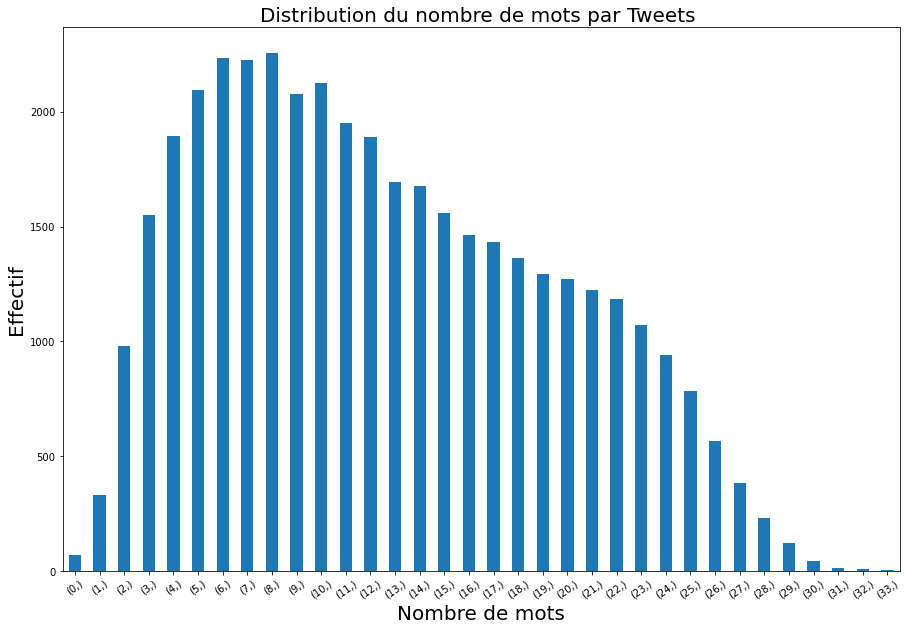

<IPython.core.display.Javascript object>

In [160]:
plt.figure(figsize=(15, 10))
tweets_length_sorted_df.plot.bar()
plt.xlabel("Nombre de mots", fontsize=20)
plt.xticks(rotation=35)
plt.ylabel("Effectif", fontsize=20)
plt.title("Distribution du nombre de mots par Tweets ", fontsize=20)
plt.show()

### <span style='color:#019DA0'>Synth√®se :</span>
- Nous constatons qu'au del√† de 27 mots, on a une fr√©quence de moins de 200 tweets par nombre de mots.
> Nous faisons le choix de retenir une **longeur maximale de 27 mots**

### <span style='color:#6A00B3'>Tokenization :</span>
- OOV : 'Out Of Vocabulary'. Le tokenizer va g√©n√©rer un token pour chaquer mot et remplacer chaque mot qu'il ne connait pas par le token 'OOV'
- word_to_index = dictionnaire mot - indice du mot

In [161]:
MAX_WORD_LENGTH = 27
oov_tk = "<OOV>"
trunc_type = "post"
padding_type = "post"

<IPython.core.display.Javascript object>

In [162]:
tokenizer = Tokenizer(oov_token=oov_tk)
tokenizer.fit_on_texts(X_train_sample)

word_to_index = tokenizer.word_index
vocabulary_size = len(word_to_index) + 1

print("Vocabulary size :", vocabulary_size)

Vocabulary size : 31834


<IPython.core.display.Javascript object>

##### Sauvegarde du Tokenizer pour √™tre utilis√© lors du d√©ploiement sur Azure

In [163]:
tokenizer_json = tokenizer.to_json()
with io.open("tokenizer.json", "w", encoding="utf-8") as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

<IPython.core.display.Javascript object>

In [164]:
len(word_to_index)

31833

<IPython.core.display.Javascript object>

In [165]:
word_to_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'my': 6,
 'and': 7,
 'you': 8,
 'it': 9,
 'is': 10,
 'for': 11,
 'in': 12,
 'of': 13,
 'on': 14,
 'me': 15,
 'so': 16,
 'have': 17,
 'that': 18,
 'but': 19,
 "i'm": 20,
 'just': 21,
 'be': 22,
 'with': 23,
 'at': 24,
 'not': 25,
 'was': 26,
 'day': 27,
 'this': 28,
 'now': 29,
 'good': 30,
 'up': 31,
 'all': 32,
 'like': 33,
 'get': 34,
 'out': 35,
 'no': 36,
 'are': 37,
 'go': 38,
 'do': 39,
 'your': 40,
 'too': 41,
 'today': 42,
 "it's": 43,
 'work': 44,
 'quot': 45,
 'going': 46,
 'love': 47,
 'time': 48,
 'am': 49,
 'got': 50,
 'back': 51,
 'from': 52,
 'lol': 53,
 'what': 54,
 'we': 55,
 'u': 56,
 'one': 57,
 'will': 58,
 'really': 59,
 'know': 60,
 'about': 61,
 'had': 62,
 "don't": 63,
 'can': 64,
 'amp': 65,
 'im': 66,
 'some': 67,
 'see': 68,
 'well': 69,
 'its': 70,
 'if': 71,
 'night': 72,
 'new': 73,
 "can't": 74,
 'still': 75,
 'home': 76,
 'think': 77,
 'how': 78,
 'oh': 79,
 'thanks': 80,
 'as': 81,
 'want': 82,
 'morn

<IPython.core.display.Javascript object>

### <span style='color:#6A00B3'>Cr√©ation de s√©quences:</span>
- On transforme les jeux de donn√©es en s√©quences
- Dans une s√©quence, chaque mot est remplac√© par son indice dans le dictionnaire (Ex : 2 = i)

In [166]:
X_train_sample_sequences = tokenizer.texts_to_sequences(X_train_sample)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_app_sequences = tokenizer.texts_to_sequences(X_app)

<IPython.core.display.Javascript object>

In [167]:
X_train_sample

array(["Ahhhhhh someone help me get picked up from here! No one's picking up the phone",
       'just found out an old friend of mine passed away',
       "I love your show! I've subscribed and following your tweets. Can't wait to see more",
       ..., 'have you ever tried an Alesis Andromeda A6?',
       "Hi Mike! I would love for you to download my cd, &quot;bend&quot;, for $4 You'll luv it!",
       'I throw dinner parties like I have space for but comfortably can only fit .'],
      dtype=object)

<IPython.core.display.Javascript object>

In [168]:
X_train_sample_sequences

[[5070, 231, 241, 15, 34, 1511, 31, 52, 85, 36, 2423, 2807, 31, 4, 215],
 [21, 310, 35, 93, 238, 259, 13, 403, 918, 209],
 [2, 47, 40, 187, 140, 7031, 7, 409, 40, 428, 74, 139, 3, 68, 88],
 [2,
  12914,
  1225,
  5,
  1512,
  214,
  2,
  1226,
  77,
  2,
  58,
  29,
  842,
  23,
  32,
  4,
  278,
  23,
  181,
  485,
  46,
  14,
  343,
  194],
 [331,
  14,
  181,
  121,
  51,
  3,
  12915,
  457,
  117,
  58,
  1810,
  86,
  2988,
  2,
  102,
  59,
  1016,
  29],
 [12, 257, 461, 4, 1292, 10, 14, 4, 8931, 364, 2217, 8, 170, 388, 2, 58, 286],
 [2, 115, 2, 142, 38, 20, 487, 172, 208, 209],
 [15, 19, 2, 63, 299, 12, 673, 5],
 [152, 40, 2547, 12916, 30, 249, 46, 826, 1201],
 [21, 479, 250, 5, 986, 9, 1313, 528, 18, 135, 26, 25, 344, 24, 8932],
 [70, 111, 17, 16, 326, 12917, 12, 57, 27, 12918, 235, 70, 242],
 [28, 10, 2548, 21, 93, 2808, 194, 19, 2, 249, 505, 200, 1092, 12919, 29],
 [5870,
  78,
  39,
  2,
  2989,
  67,
  148,
  20,
  409,
  7,
  78,
  39,
  2,
  2313,
  32,
  380,
  1556,
  

<IPython.core.display.Javascript object>

##### Version sur tout le jeu d'entrainement et de test pour entrainement du mod√®le finale sur tout le jeu d'entrainement

In [169]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

<IPython.core.display.Javascript object>

##### Version avec tweets non pr√©process√©s et light pr√©process√©s pour comparaison des r√©sulats

In [170]:
X_train_sample_notpreprocessed_sequences = tokenizer.texts_to_sequences(
    X_train_sample_notpreprocessed
)
X_val_notpreprocessed_sequences = tokenizer.texts_to_sequences(X_val_notpreprocessed)

<IPython.core.display.Javascript object>

In [171]:
X_train_sample_lightpreprocessed_sequences = tokenizer.texts_to_sequences(
    X_train_sample_lightpreprocessed
)
X_val_lightpreprocessed_sequences = tokenizer.texts_to_sequences(
    X_val_lightpreprocessed
)

<IPython.core.display.Javascript object>

### <span style='color:#6A00B3'>Nota Bene :</span>
Les s√©quences ont des dimensions diff√©rentes : dimension s√©quence = nombre de mots dans la s√©quence 

### <span style='color:#6A00B3'>Padding des s√©quences :</span>
- Le Padding est utilis√© pour g√©rer des phrases (tweets dans notre cas) avec de longueurs diff√©rentes
- Les r√©seaux de neurones fonctionnent mieux avec des s√©quences de m√™me dimension
- On va compl√©ter les s√©quences pour qu'elles aient toutes la m√™me dimension (dimension = max_word_length)

In [172]:
X_train_sample_pad = pad_sequences(
    X_train_sample_sequences,
    maxlen=MAX_WORD_LENGTH,
    padding=padding_type,
    truncating=trunc_type,
)
X_val_pad = pad_sequences(
    X_val_sequences, maxlen=MAX_WORD_LENGTH, padding=padding_type, truncating=trunc_type
)
X_app_pad = pad_sequences(
    X_app_sequences, maxlen=MAX_WORD_LENGTH, padding=padding_type, truncating=trunc_type
)

<IPython.core.display.Javascript object>

In [173]:
print("X_train_sample_pad Shape:", X_train_sample_pad.shape)
print("X_val_pad Shape:", X_val_pad.shape)
print("X_app_pad Shape:", X_app_pad.shape)

X_train_sample_pad Shape: (40000, 27)
X_val_pad Shape: (35000, 27)
X_app_pad Shape: (2000, 27)


<IPython.core.display.Javascript object>

In [174]:
X_train_sample_pad

array([[5070,  231,  241, ...,    0,    0,    0],
       [  21,  310,   35, ...,    0,    0,    0],
       [   2,   47,   40, ...,    0,    0,    0],
       ...,
       [  17,    8,  230, ...,    0,    0,    0],
       [ 282, 1966,    2, ...,    0,    0,    0],
       [   2, 1608,  362, ...,    0,    0,    0]], dtype=int32)

<IPython.core.display.Javascript object>

In [175]:
X_train_sample_pad[0]

array([5070,  231,  241,   15,   34, 1511,   31,   52,   85,   36, 2423,
       2807,   31,    4,  215,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

<IPython.core.display.Javascript object>

In [176]:
len(X_train_sample_pad[0])

27

<IPython.core.display.Javascript object>

In [177]:
X_train_sample_pad[1]

array([ 21, 310,  35,  93, 238, 259,  13, 403, 918, 209,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0], dtype=int32)

<IPython.core.display.Javascript object>

In [178]:
len(X_train_sample_pad[1])

27

<IPython.core.display.Javascript object>

In [179]:
print("y_train_sample shape:", y_train_sample.shape)
print("y_val shape:", y_val.shape)
print("y_app shape:", y_app.shape)

y_train_sample shape: (40000,)
y_val shape: (35000,)
y_app shape: (2000,)


<IPython.core.display.Javascript object>

##### Version sur tout le jeu d'entrainement et de test pour entrainement du mod√®le finale sur tout le jeu d'entrainement

In [180]:
X_train_pad = pad_sequences(
    X_train_sequences,
    maxlen=MAX_WORD_LENGTH,
    padding=padding_type,
    truncating=trunc_type,
)
X_test_pad = pad_sequences(
    X_test_sequences,
    maxlen=MAX_WORD_LENGTH,
    padding=padding_type,
    truncating=trunc_type,
)

<IPython.core.display.Javascript object>

##### Version avec tweets non pr√©process√©s et light pr√©process√©s pour comparaison des r√©sulats

In [181]:
X_train_sample_notpreprocessed_pad = pad_sequences(
    X_train_sample_notpreprocessed_sequences,
    maxlen=MAX_WORD_LENGTH,
    padding=padding_type,
    truncating=trunc_type,
)
X_val_notpreprocessed_pad = pad_sequences(
    X_val_notpreprocessed_sequences,
    maxlen=MAX_WORD_LENGTH,
    padding=padding_type,
    truncating=trunc_type,
)

<IPython.core.display.Javascript object>

In [182]:
X_train_sample_lightpreprocessed_pad = pad_sequences(
    X_train_sample_lightpreprocessed_sequences,
    maxlen=MAX_WORD_LENGTH,
    padding=padding_type,
    truncating=trunc_type,
)
X_val_lightpreprocessed_pad = pad_sequences(
    X_val_lightpreprocessed_sequences,
    maxlen=MAX_WORD_LENGTH,
    padding=padding_type,
    truncating=trunc_type,
)

<IPython.core.display.Javascript object>

### <span style='color:#6A00B3'>Fonction permettant de calculer le temps d'un mod√®le :</span>
- En plus de comparer l'Accuracy entre les diff√©rents mod√®les nous allons √©galement calculer le **temps d'ex√©cution** de chaque mod√®le afin de choisir le meilleur
- Pour cela nous utilisons la fonction 'Callback' ci-dessous

In [183]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

<IPython.core.display.Javascript object>

In [184]:
time_callback = TimeHistory()

<IPython.core.display.Javascript object>

In [185]:
# Hyper param√®tres
NUM_EPOCHS = 7
BATCH_SIZE = 128
NUM_NEURONS = 50
EMBEDDING_DIMENSION = 300

<IPython.core.display.Javascript object>

>## <span style='color:green' id="section_4_3" >4.3. Mod√©lisations utilisant diff√©rentes architectures de r√©seaux de neurones</span>

- Nous allons mettre en place et comparer les diff√©rentes architectures de mod√®les :
    - avec plongements de mots appris par le r√©seau
    - puis avec plongements de mots fournis au r√©seau

#### Fonction 'utiliataire' permettant d'afficher l'√©volution de l'accuracy en fonction du nombre d'epochs

In [186]:
def plot_accuracy_loss(model_history):
    plt.figure()
    plt.plot(model_history.history["accuracy"])
    plt.plot(model_history.history["val_accuracy"])
    plt.legend(["Train", "Validation"])
    plt.title("Evolution de l'accuracy en fonction du nombre d'epochs")
    plt.show()

<IPython.core.display.Javascript object>

>>## <span style='color:#D15C22' id="section_4_3_1" >4.3.1 Words Embedding appris par le r√©seau</span>

### <span style='color:#6A00B3'>**1. Simple RNN (Recurrent Neural Networks) Model**</span>

In [187]:
simple_RNN_model = Sequential()
simple_RNN_model.add(
    Embedding(
        input_dim=vocabulary_size,
        output_dim=EMBEDDING_DIMENSION,
        input_length=MAX_WORD_LENGTH,
    )
)
simple_RNN_model.add(SimpleRNN(units=NUM_NEURONS))
simple_RNN_model.add(Dense(units=1, activation="sigmoid"))
simple_RNN_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_RNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 27, 300)           9550200   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 50)                17550     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 9,567,801
Trainable params: 9,567,801
Non-trainable params: 0
_________________________________________________________________


2022-06-30 21:12:00.229376: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-30 21:12:00.259579: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2994465000 Hz
2022-06-30 21:12:00.260668: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563dfdb2a990 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-30 21:12:00.260718: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-30 21:12:00.261974: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.

<IPython.core.display.Javascript object>

In [188]:
%%time
history_simple_RNN_model = simple_RNN_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

2022-06-30 21:12:00.429808: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/7
313/313 [==============================] - 31s 93ms/step - loss: 0.6295 - accuracy: 0.6264 - val_loss: 0.5046 - val_accuracy: 0.7595
Epoch 2/7
313/313 [==============================] - 27s 87ms/step - loss: 0.3549 - accuracy: 0.8527 - val_loss: 0.5377 - val_accuracy: 0.7503
Epoch 3/7
313/313 [==============================] - 26s 85ms/step - loss: 0.1741 - accuracy: 0.9381 - val_loss: 0.6379 - val_accuracy: 0.7288
Epoch 4/7
313/313 [==============================] - 26s 84ms/step - loss: 0.0929 - accuracy: 0.9687 - val_loss: 0.7581 - val_accuracy: 0.7179
Epoch 5/7
313/313 [==============================] - 26s 84ms/step - loss: 0.0607 - accuracy: 0.9809 - val_loss: 0.8606 - val_accuracy: 0.7302
Epoch 6/7
313/313 [==============================] - 27s 85ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.9823 - val_accuracy: 0.7358
Epoch 7/7
313/313 [==============================] - 26s 85ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 1.0459 - val_accuracy: 0.7122

<IPython.core.display.Javascript object>

In [189]:
times_simple_RNN_model = time_callback.times

<IPython.core.display.Javascript object>

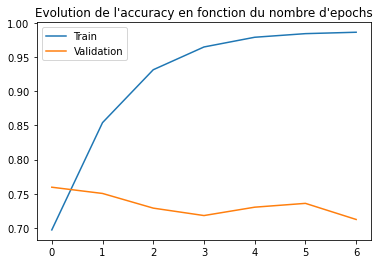

<IPython.core.display.Javascript object>

In [190]:
plot_accuracy_loss(history_simple_RNN_model)

### <span style='color:#6A00B3'>**2. Simple LSTM (Long Short Term Memory) Model**</span>

In [191]:
simple_LSTM_model = Sequential()
simple_LSTM_model.add(
    Embedding(
        input_dim=vocabulary_size,
        output_dim=EMBEDDING_DIMENSION,
        input_length=MAX_WORD_LENGTH,
    )
)
simple_LSTM_model.add(LSTM(units=NUM_NEURONS))
simple_LSTM_model.add(Dense(units=1, activation="sigmoid"))
simple_LSTM_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 27, 300)           9550200   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                70200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 9,620,451
Trainable params: 9,620,451
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [192]:
%%time
history_simple_LSTM_model = simple_LSTM_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

Epoch 1/7
313/313 [==============================] - 37s 111ms/step - loss: 0.6088 - accuracy: 0.6298 - val_loss: 0.4771 - val_accuracy: 0.7749
Epoch 2/7
313/313 [==============================] - 34s 109ms/step - loss: 0.3711 - accuracy: 0.8415 - val_loss: 0.4895 - val_accuracy: 0.7693
Epoch 3/7
313/313 [==============================] - 35s 112ms/step - loss: 0.2674 - accuracy: 0.8922 - val_loss: 0.5247 - val_accuracy: 0.7607
Epoch 4/7
313/313 [==============================] - 35s 112ms/step - loss: 0.2089 - accuracy: 0.9159 - val_loss: 0.6460 - val_accuracy: 0.7570
Epoch 5/7
313/313 [==============================] - 34s 110ms/step - loss: 0.1625 - accuracy: 0.9340 - val_loss: 0.7153 - val_accuracy: 0.7502
Epoch 6/7
313/313 [==============================] - 34s 107ms/step - loss: 0.1230 - accuracy: 0.9495 - val_loss: 0.8658 - val_accuracy: 0.7520
Epoch 7/7
313/313 [==============================] - 35s 111ms/step - loss: 0.0980 - accuracy: 0.9619 - val_loss: 0.9360 - val_accuracy:

<IPython.core.display.Javascript object>

In [193]:
times_simple_LSTM_model = time_callback.times

<IPython.core.display.Javascript object>

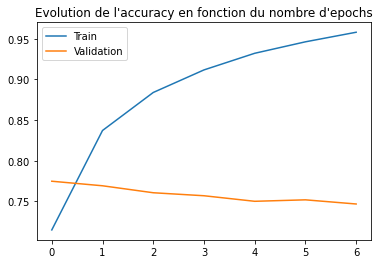

<IPython.core.display.Javascript object>

In [194]:
plot_accuracy_loss(history_simple_LSTM_model)

### <span style='color:#6A00B3'>**3. Simple GRU (Gated Recurrent Units) Model**</span>

In [195]:
simple_GRU_model = Sequential()
simple_GRU_model.add(
    Embedding(
        input_dim=vocabulary_size,
        output_dim=EMBEDDING_DIMENSION,
        input_length=MAX_WORD_LENGTH,
    )
)
simple_GRU_model.add(GRU(units=NUM_NEURONS))
simple_GRU_model.add(Dense(units=1, activation="sigmoid"))
simple_GRU_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_GRU_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 27, 300)           9550200   
_________________________________________________________________
gru (GRU)                    (None, 50)                52800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 9,603,051
Trainable params: 9,603,051
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [196]:
%%time
history_simple_GRU_model = simple_GRU_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

Epoch 1/7
313/313 [==============================] - 38s 114ms/step - loss: 0.6643 - accuracy: 0.5453 - val_loss: 0.4833 - val_accuracy: 0.7696
Epoch 2/7
313/313 [==============================] - 35s 111ms/step - loss: 0.4029 - accuracy: 0.8229 - val_loss: 0.4756 - val_accuracy: 0.7770
Epoch 3/7
313/313 [==============================] - 34s 110ms/step - loss: 0.2846 - accuracy: 0.8886 - val_loss: 0.5188 - val_accuracy: 0.7646
Epoch 4/7
313/313 [==============================] - 34s 107ms/step - loss: 0.2060 - accuracy: 0.9205 - val_loss: 0.6108 - val_accuracy: 0.7542
Epoch 5/7
313/313 [==============================] - 34s 109ms/step - loss: 0.1566 - accuracy: 0.9424 - val_loss: 0.6939 - val_accuracy: 0.7487
Epoch 6/7
313/313 [==============================] - 34s 108ms/step - loss: 0.1165 - accuracy: 0.9564 - val_loss: 0.8284 - val_accuracy: 0.7411
Epoch 7/7
313/313 [==============================] - 34s 107ms/step - loss: 0.0964 - accuracy: 0.9630 - val_loss: 0.9032 - val_accuracy:

<IPython.core.display.Javascript object>

In [197]:
times_simple_GRU_model = time_callback.times

<IPython.core.display.Javascript object>

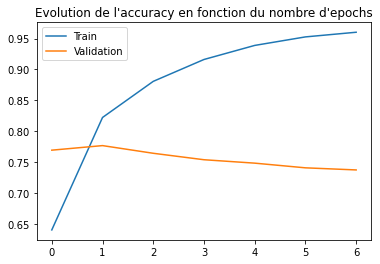

<IPython.core.display.Javascript object>

In [198]:
plot_accuracy_loss(history_simple_GRU_model)

### <span style='color:#6A00B3'>**4. Bidirectional LSTM Model**</span>

In [199]:
bidir_LSTM_model = Sequential()
bidir_LSTM_model.add(
    Embedding(
        input_dim=vocabulary_size,
        output_dim=EMBEDDING_DIMENSION,
        input_length=MAX_WORD_LENGTH,
    )
)
bidir_LSTM_model.add(Bidirectional(LSTM(units=NUM_NEURONS)))
bidir_LSTM_model.add(Dense(units=1, activation="sigmoid"))
bidir_LSTM_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
bidir_LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 27, 300)           9550200   
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               140400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 9,690,701
Trainable params: 9,690,701
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [200]:
%%time
history_bidir_LSTM_model = bidir_LSTM_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

Epoch 1/7
313/313 [==============================] - 50s 147ms/step - loss: 0.5865 - accuracy: 0.6686 - val_loss: 0.4732 - val_accuracy: 0.7757
Epoch 2/7
313/313 [==============================] - 46s 148ms/step - loss: 0.3591 - accuracy: 0.8452 - val_loss: 0.5001 - val_accuracy: 0.7699
Epoch 3/7
313/313 [==============================] - 46s 147ms/step - loss: 0.2539 - accuracy: 0.8968 - val_loss: 0.5448 - val_accuracy: 0.7636
Epoch 4/7
313/313 [==============================] - 47s 149ms/step - loss: 0.1842 - accuracy: 0.9249 - val_loss: 0.6147 - val_accuracy: 0.7573
Epoch 5/7
313/313 [==============================] - 47s 150ms/step - loss: 0.1411 - accuracy: 0.9453 - val_loss: 0.7878 - val_accuracy: 0.7522
Epoch 6/7
313/313 [==============================] - 47s 150ms/step - loss: 0.1061 - accuracy: 0.9587 - val_loss: 0.8362 - val_accuracy: 0.7512
Epoch 7/7
313/313 [==============================] - 47s 148ms/step - loss: 0.0863 - accuracy: 0.9660 - val_loss: 0.9581 - val_accuracy:

<IPython.core.display.Javascript object>

In [201]:
times_bidir_LSTM_model = time_callback.times

<IPython.core.display.Javascript object>

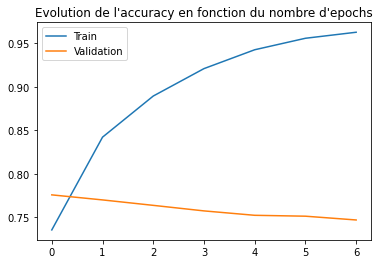

<IPython.core.display.Javascript object>

In [202]:
plot_accuracy_loss(history_bidir_LSTM_model)

##### Remarque :
- Tous les mod√®les sont en overfitting

>>## <span style='color:#D15C22' id="section_4_3_2" >4.3.2 Words Embedding fourni au r√©seau</span>

### <span style='color:#6A00B3'>**1. Simple RNN Model**</span>

In [203]:
simple_RNN_embed_model = Sequential()
simple_RNN_embed_model.add(
    Embedding(
        vocabulary_size,
        GLOVE_EMBEDDING_DIMENSION,
        weights=[glove_embedding_matrix],
        input_length=MAX_WORD_LENGTH,
        trainable=False,
    )
)
simple_RNN_embed_model.add(SimpleRNN(units=NUM_NEURONS))
simple_RNN_embed_model.add(Dense(units=1, activation="sigmoid"))
simple_RNN_embed_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_RNN_embed_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 27, 300)           9550200   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                17550     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 9,567,801
Trainable params: 17,601
Non-trainable params: 9,550,200
_________________________________________________________________


<IPython.core.display.Javascript object>

In [204]:
%%time
history_simple_RNN_embed_model = simple_RNN_embed_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

Epoch 1/7
313/313 [==============================] - 10s 30ms/step - loss: 0.6486 - accuracy: 0.6028 - val_loss: 0.5574 - val_accuracy: 0.7195
Epoch 2/7
313/313 [==============================] - 8s 26ms/step - loss: 0.5411 - accuracy: 0.7294 - val_loss: 0.5424 - val_accuracy: 0.7284
Epoch 3/7
313/313 [==============================] - 8s 27ms/step - loss: 0.5275 - accuracy: 0.7437 - val_loss: 0.5440 - val_accuracy: 0.7312
Epoch 4/7
313/313 [==============================] - 8s 26ms/step - loss: 0.5130 - accuracy: 0.7502 - val_loss: 0.5470 - val_accuracy: 0.7199
Epoch 5/7
313/313 [==============================] - 8s 26ms/step - loss: 0.5018 - accuracy: 0.7578 - val_loss: 0.5348 - val_accuracy: 0.7330
Epoch 6/7
313/313 [==============================] - 8s 27ms/step - loss: 0.4852 - accuracy: 0.7676 - val_loss: 0.5374 - val_accuracy: 0.7372
Epoch 7/7
313/313 [==============================] - 8s 26ms/step - loss: 0.4754 - accuracy: 0.7751 - val_loss: 0.5440 - val_accuracy: 0.7295
CPU t

<IPython.core.display.Javascript object>

In [205]:
times_simple_RNN_embed_model = time_callback.times

<IPython.core.display.Javascript object>

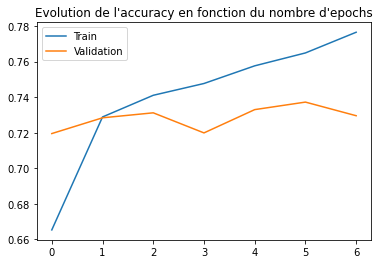

<IPython.core.display.Javascript object>

In [206]:
plot_accuracy_loss(history_simple_RNN_embed_model)

### <span style='color:#6A00B3'>**2. Simple LSTM (Long Short Term Memory) Model**</span>

In [207]:
simple_LSTM_embed_model = Sequential()
simple_LSTM_embed_model.add(
    Embedding(
        vocabulary_size,
        GLOVE_EMBEDDING_DIMENSION,
        weights=[glove_embedding_matrix],
        input_length=MAX_WORD_LENGTH,
        trainable=False,
    )
)
simple_LSTM_embed_model.add(LSTM(units=NUM_NEURONS))
simple_LSTM_embed_model.add(Dense(units=1, activation="sigmoid"))
simple_LSTM_embed_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_LSTM_embed_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 27, 300)           9550200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 9,620,451
Trainable params: 70,251
Non-trainable params: 9,550,200
_________________________________________________________________


<IPython.core.display.Javascript object>

In [208]:
%%time
history_simple_LSTM_embed_model = simple_LSTM_embed_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

Epoch 1/7
313/313 [==============================] - 18s 50ms/step - loss: 0.6080 - accuracy: 0.6437 - val_loss: 0.5268 - val_accuracy: 0.7425
Epoch 2/7
313/313 [==============================] - 15s 49ms/step - loss: 0.4942 - accuracy: 0.7579 - val_loss: 0.4970 - val_accuracy: 0.7587
Epoch 3/7
313/313 [==============================] - 15s 47ms/step - loss: 0.4654 - accuracy: 0.7755 - val_loss: 0.4864 - val_accuracy: 0.7667
Epoch 4/7
313/313 [==============================] - 15s 47ms/step - loss: 0.4417 - accuracy: 0.7894 - val_loss: 0.4970 - val_accuracy: 0.7621
Epoch 5/7
313/313 [==============================] - 15s 48ms/step - loss: 0.4241 - accuracy: 0.8004 - val_loss: 0.4838 - val_accuracy: 0.7738
Epoch 6/7
313/313 [==============================] - 15s 47ms/step - loss: 0.4015 - accuracy: 0.8134 - val_loss: 0.5091 - val_accuracy: 0.7719
Epoch 7/7
313/313 [==============================] - 15s 48ms/step - loss: 0.3824 - accuracy: 0.8267 - val_loss: 0.5076 - val_accuracy: 0.7728

<IPython.core.display.Javascript object>

In [209]:
times_simple_LSTM_embed_model = time_callback.times

<IPython.core.display.Javascript object>

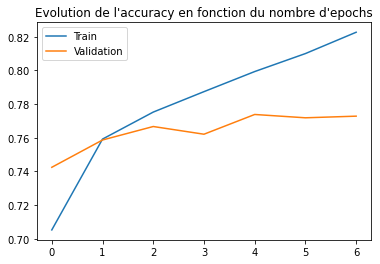

<IPython.core.display.Javascript object>

In [210]:
plot_accuracy_loss(history_simple_LSTM_embed_model)

### <span style='color:#6A00B3'>**3. Simple GRU (Gated Recurrent Units) Model**</span>

In [211]:
simple_GRU_embed_model = Sequential()
simple_GRU_embed_model.add(
    Embedding(
        vocabulary_size,
        GLOVE_EMBEDDING_DIMENSION,
        weights=[glove_embedding_matrix],
        input_length=MAX_WORD_LENGTH,
        trainable=False,
    )
)
simple_GRU_embed_model.add(GRU(units=NUM_NEURONS))
simple_GRU_embed_model.add(Dense(units=1, activation="sigmoid"))
simple_GRU_embed_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_GRU_embed_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 27, 300)           9550200   
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                52800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 9,603,051
Trainable params: 52,851
Non-trainable params: 9,550,200
_________________________________________________________________


<IPython.core.display.Javascript object>

In [212]:
%%time
history_simple_GRU_embed_model = simple_GRU_embed_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

Epoch 1/7
313/313 [==============================] - 20s 55ms/step - loss: 0.6449 - accuracy: 0.5863 - val_loss: 0.5193 - val_accuracy: 0.7466
Epoch 2/7
313/313 [==============================] - 16s 50ms/step - loss: 0.4924 - accuracy: 0.7607 - val_loss: 0.4915 - val_accuracy: 0.7624
Epoch 3/7
313/313 [==============================] - 15s 48ms/step - loss: 0.4638 - accuracy: 0.7800 - val_loss: 0.4810 - val_accuracy: 0.7685
Epoch 4/7
313/313 [==============================] - 15s 47ms/step - loss: 0.4424 - accuracy: 0.7926 - val_loss: 0.4811 - val_accuracy: 0.7731
Epoch 5/7
313/313 [==============================] - 15s 48ms/step - loss: 0.4266 - accuracy: 0.8027 - val_loss: 0.4819 - val_accuracy: 0.7733
Epoch 6/7
313/313 [==============================] - 15s 48ms/step - loss: 0.4106 - accuracy: 0.8112 - val_loss: 0.4941 - val_accuracy: 0.7754
Epoch 7/7
313/313 [==============================] - 15s 48ms/step - loss: 0.3881 - accuracy: 0.8249 - val_loss: 0.5060 - val_accuracy: 0.7729

<IPython.core.display.Javascript object>

In [213]:
times_simple_GRU_embed_model = time_callback.times

<IPython.core.display.Javascript object>

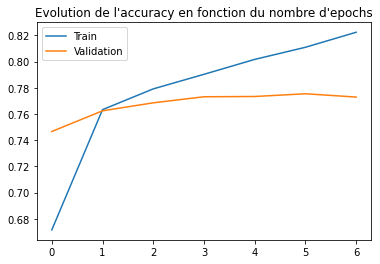

<IPython.core.display.Javascript object>

In [214]:
plot_accuracy_loss(history_simple_GRU_embed_model)

### <span style='color:#6A00B3'>**4. Bidirectional LSTM Model**</span>

In [215]:
bidir_LSTM_embed_model = Sequential()
bidir_LSTM_embed_model.add(
    Embedding(
        vocabulary_size,
        GLOVE_EMBEDDING_DIMENSION,
        weights=[glove_embedding_matrix],
        input_length=MAX_WORD_LENGTH,
        trainable=False,
    )
)
bidir_LSTM_embed_model.add(Bidirectional(LSTM(units=NUM_NEURONS)))
bidir_LSTM_embed_model.add(Dense(units=1, activation="sigmoid"))
bidir_LSTM_embed_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
bidir_LSTM_embed_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 27, 300)           9550200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 9,690,701
Trainable params: 140,501
Non-trainable params: 9,550,200
_________________________________________________________________


<IPython.core.display.Javascript object>

In [216]:
%%time
history_bidir_LSTM_embed_model = bidir_LSTM_embed_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val), callbacks=time_callback)

Epoch 1/7
313/313 [==============================] - 31s 86ms/step - loss: 0.5966 - accuracy: 0.6657 - val_loss: 0.5177 - val_accuracy: 0.7453
Epoch 2/7
313/313 [==============================] - 26s 83ms/step - loss: 0.4864 - accuracy: 0.7615 - val_loss: 0.4918 - val_accuracy: 0.7612
Epoch 3/7
313/313 [==============================] - 27s 85ms/step - loss: 0.4578 - accuracy: 0.7829 - val_loss: 0.4918 - val_accuracy: 0.7610
Epoch 4/7
313/313 [==============================] - 26s 84ms/step - loss: 0.4284 - accuracy: 0.7976 - val_loss: 0.4809 - val_accuracy: 0.7704
Epoch 5/7
313/313 [==============================] - 26s 84ms/step - loss: 0.4011 - accuracy: 0.8165 - val_loss: 0.4779 - val_accuracy: 0.7721
Epoch 6/7
313/313 [==============================] - 26s 84ms/step - loss: 0.3670 - accuracy: 0.8333 - val_loss: 0.5136 - val_accuracy: 0.7705
Epoch 7/7
313/313 [==============================] - 26s 84ms/step - loss: 0.3373 - accuracy: 0.8541 - val_loss: 0.5147 - val_accuracy: 0.7699

<IPython.core.display.Javascript object>

In [217]:
times_bidir_LSTM_embed_model = time_callback.times

<IPython.core.display.Javascript object>

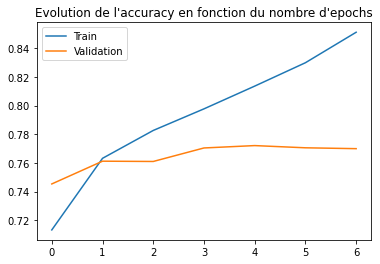

<IPython.core.display.Javascript object>

In [218]:
plot_accuracy_loss(history_bidir_LSTM_embed_model)

##### Remarques :
- Les r√©sultats en terme d'Accuracy sont l√©g√®rement meilleurs pour les mod√®les avec couche d'embedding fournie au r√©seau
- Les mod√®les avec couche d'embedding fournie au r√©seau permettent de r√©duire nettement l'overfitting

>## <span style='color:green' id="section_4_4" >4.4. Comparaison des mod√®les et s√©lection du meilleur mod√®le</span>

- Nous comparons :
    - l'Accuracy
    - le temps d'ex√©cution

In [219]:
name_history_models = [
    "simple_RNN_model",
    "simple_LSTM_model",
    "simple_GRU_model",
    "bidir_LSTM_model",
]
list_history_models = [
    history_simple_RNN_model,
    history_simple_LSTM_model,
    history_simple_GRU_model,
    history_bidir_LSTM_model,
]
list_times_models = [
    times_simple_RNN_model,
    times_simple_LSTM_model,
    times_simple_GRU_model,
    times_bidir_LSTM_model,
]

name_history_embed_models = [
    "simple_RNN_embed_model",
    "simple_LSTM_embed_model",
    "simple_GRU_embed_model",
    "bidir_LSTM_embed_model",
]
list_history_embed_models = [
    history_simple_RNN_embed_model,
    history_simple_LSTM_embed_model,
    history_simple_GRU_embed_model,
    history_bidir_LSTM_embed_model,
]
list_times_embed_models = [
    times_simple_RNN_embed_model,
    times_simple_LSTM_embed_model,
    times_simple_GRU_embed_model,
    times_bidir_LSTM_embed_model,
]

<IPython.core.display.Javascript object>

#### <span style='color:#6A00B3'>Comparaison des scores d'Accuracy et des temps d'ex√©cution pour les mod√®les dont les words embeddings sont appris par les r√©seaux</span>

In [220]:
best_accuracy_per_model = {}
time_per_model = {}
for i, model_history in enumerate(list_history_models):
    best_accuracy_per_model[name_history_models[i]] = max(
        model_history.history["val_accuracy"]
    )
    time_per_model[name_history_models[i]] = list_times_models[i][
        np.argmax(model_history.history["val_accuracy"])
    ]

<IPython.core.display.Javascript object>

In [221]:
best_accuracy_per_model_sorted = dict(
    sorted(best_accuracy_per_model.items(), key=lambda item: item[1], reverse=True)
)

<IPython.core.display.Javascript object>

In [222]:
best_accuracy_per_model_sorted

{'simple_GRU_model': 0.7770000100135803,
 'bidir_LSTM_model': 0.775685727596283,
 'simple_LSTM_model': 0.7748571634292603,
 'simple_RNN_model': 0.7594571709632874}

<IPython.core.display.Javascript object>

In [336]:
# function to add value labels
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 3), round(y[i], 3), ha="center", fontsize=14)

<IPython.core.display.Javascript object>

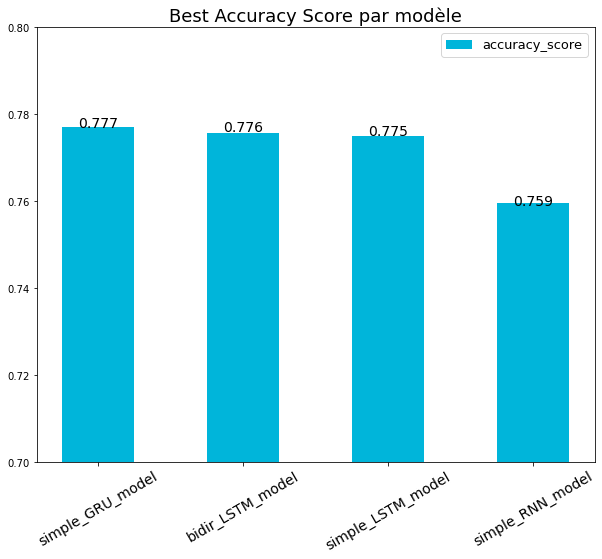

<IPython.core.display.Javascript object>

In [337]:
width = 0.5
ind = np.arange(len(best_accuracy_per_model_sorted.items()))

plt.figure(figsize=(10, 8))
plt.bar(
    ind,
    best_accuracy_per_model_sorted.values(),
    width,
    color="#00B5DA",
    label="accuracy_score",
)
addlabels(ind, list(best_accuracy_per_model_sorted.values()))
plt.xticks(
    range(len(best_accuracy_per_model_sorted.items())),
    best_accuracy_per_model_sorted.keys(),
    fontsize=14,
    rotation=30,
)
plt.ylim(0.7, 0.8)
plt.legend(fontsize=13)
plt.title("Best Accuracy Score par mod√®le", fontsize=18)
plt.show()

In [224]:
time_per_model_sorted = dict(sorted(time_per_model.items(), key=lambda item: item[1]))

<IPython.core.display.Javascript object>

In [225]:
time_per_model_sorted

{'simple_RNN_model': 30.645023584365845,
 'simple_GRU_model': 34.79174494743347,
 'simple_LSTM_model': 37.23542928695679,
 'bidir_LSTM_model': 50.061458110809326}

<IPython.core.display.Javascript object>

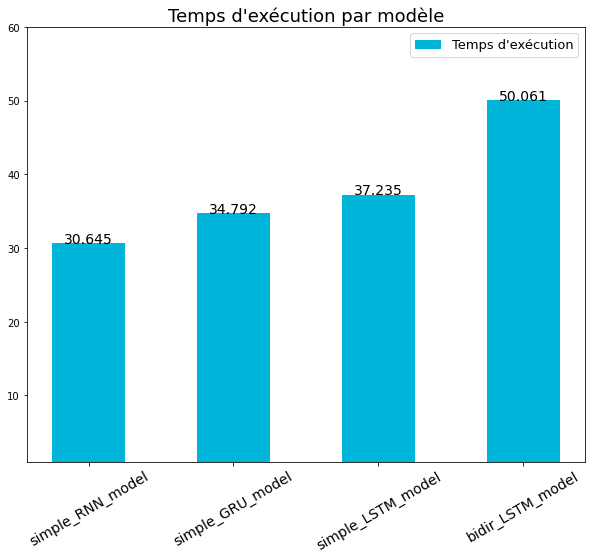

<IPython.core.display.Javascript object>

In [338]:
width = 0.5
ind = np.arange(len(time_per_model_sorted.items()))

plt.figure(figsize=(10, 8))
plt.bar(
    ind,
    time_per_model_sorted.values(),
    width,
    color="#00B5DA",
    label="Temps d'ex√©cution",
)
addlabels(ind, list(time_per_model_sorted.values()))
plt.xticks(
    range(len(time_per_model_sorted.items())),
    time_per_model_sorted.keys(),
    fontsize=14,
    rotation=30,
)
plt.ylim(1, 60)
plt.legend(fontsize=13)
plt.title("Temps d'ex√©cution par mod√®le", fontsize=18)
plt.show()

#### <span style='color:#6A00B3'>Comparaison des scores d'Accuracy et des temps d'ex√©cution pour les mod√®les dont les words embeddings sont fournis aux r√©seaux</span>

In [227]:
best_accuracy_per_embed_model = {}
time_per_embed_model = {}
for i, model_history in enumerate(list_history_embed_models):
    best_accuracy_per_embed_model[name_history_embed_models[i]] = max(
        model_history.history["val_accuracy"]
    )
    time_per_embed_model[name_history_embed_models[i]] = list_times_embed_models[i][
        np.argmax(model_history.history["val_accuracy"])
    ]

<IPython.core.display.Javascript object>

In [228]:
best_accuracy_per_embed_model_sorted = dict(
    sorted(
        best_accuracy_per_embed_model.items(), key=lambda item: item[1], reverse=True
    )
)

<IPython.core.display.Javascript object>

In [229]:
best_accuracy_per_embed_model_sorted

{'simple_GRU_embed_model': 0.7753999829292297,
 'simple_LSTM_embed_model': 0.7738285660743713,
 'bidir_LSTM_embed_model': 0.7720857262611389,
 'simple_RNN_embed_model': 0.7372000217437744}

<IPython.core.display.Javascript object>

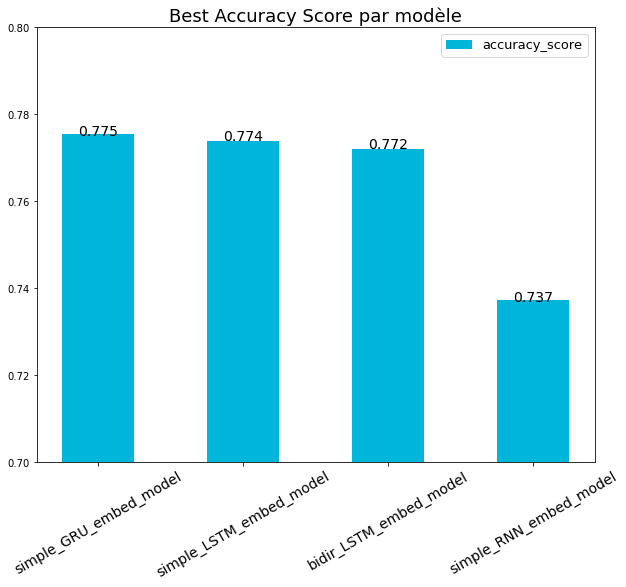

<IPython.core.display.Javascript object>

In [339]:
width = 0.5
ind = np.arange(len(best_accuracy_per_embed_model_sorted.items()))

plt.figure(figsize=(10, 8))
plt.bar(
    ind,
    best_accuracy_per_embed_model_sorted.values(),
    width,
    color="#00B5DA",
    label="accuracy_score",
)
addlabels(ind, list(best_accuracy_per_embed_model_sorted.values()))
plt.xticks(
    range(len(best_accuracy_per_embed_model_sorted.items())),
    best_accuracy_per_embed_model_sorted.keys(),
    fontsize=14,
    rotation=30,
)
plt.ylim(0.7, 0.8)
plt.legend(fontsize=13)
plt.title("Best Accuracy Score par mod√®le", fontsize=18)
plt.show()

In [330]:
time_per_embed_model_sorted = dict(
    sorted(time_per_embed_model.items(), key=lambda item: item[1])
)

<IPython.core.display.Javascript object>

In [331]:
time_per_embed_model_sorted

{'simple_RNN_embed_model': 8.431564092636108,
 'simple_LSTM_embed_model': 15.112440824508667,
 'simple_GRU_embed_model': 15.131345272064209,
 'bidir_LSTM_embed_model': 26.16947293281555}

<IPython.core.display.Javascript object>

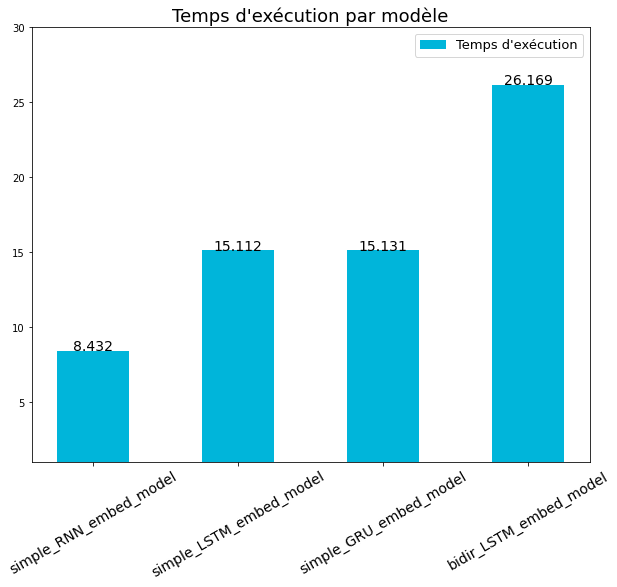

<IPython.core.display.Javascript object>

In [340]:
width = 0.5
ind = np.arange(len(time_per_embed_model_sorted.items()))

plt.figure(figsize=(10, 8))
plt.bar(
    ind,
    time_per_embed_model_sorted.values(),
    width,
    color="#00B5DA",
    label="Temps d'ex√©cution",
)
addlabels(ind, list(time_per_embed_model_sorted.values()))
plt.xticks(
    range(len(time_per_embed_model_sorted.items())),
    time_per_embed_model_sorted.keys(),
    fontsize=14,
    rotation=30,
)
plt.ylim(1, 30)
plt.legend(fontsize=13)
plt.title("Temps d'ex√©cution par mod√®le", fontsize=18)
plt.show()

### <span style='color:#019DA0'>Synth√®se et choix du meilleur mod√®le :</span>
- Les mod√®les avec la couche 'words embedding' fournie au r√©seau pr√©sente des r√©sultats meilleurs que ceux dont la couche de 'words embedding' est apprise par le r√©seau :
    - l'accuracy est √† peu pr√®s le m√™me, 
    - ils sont beaucoup plus rapides en terme de temps d'√©x√©cution,
    - ils pr√©sentent beaucoup moins d'overfitting, 
- Parmi ces mod√®les, c'est le mod√®le 'simple GRU' qui donne le meilleur r√©sultat en terme d'accuracy
- Le mod√®le 'simple GRU' est √©galement un peu plus rapide en temps d'ex√©cution compar√© au model 'simple LSTM'.
> Le meilleur mod√®le que nous retenons est le mod√®le **simple GRU avec couche de plongement de mots fournie au r√©seau**

>## <span style='color:green' id="section_4_5" >4.5. Optimisation du meilleur mod√®le</span>
- Nous allons optimiser :
    - la couche de 'words embedding' utilis√©e en essayant une autre m√©thode de plongement de mots :
        - un plongement FastText entrain√© sur les Tweets du jeu d'entrainement
    - les hyper param√®tres du mod√®le avec Keras Tuner :
        - optimisation des Dropout
        - optimisation du Learning Rate

>>## <span style='color:#D15C22' id="section_4_5_1" >4.5.1 Optimisation du plongement de mots utilis√©</span>

### <span style='color:#6A00B3'>Mod√®le FastText appris sur les Tweets du jeu d'entrainement</span>

#### Construction de la liste des tweets

In [234]:
tweets_list = [tweet.split() for tweet in tweets]

<IPython.core.display.Javascript object>

#### Entrainement du mod√®le

In [235]:
fasttext_trained_model = FastText(vector_size=10, window=3, min_count=1)

<IPython.core.display.Javascript object>

In [236]:
fasttext_trained_model.build_vocab(corpus_iterable=tweets_list)

<IPython.core.display.Javascript object>

In [237]:
fasttext_trained_model.train(
    corpus_iterable=tweets_list, total_examples=len(tweets_list), epochs=7
)

(2928019, 3520895)

<IPython.core.display.Javascript object>

#### Test du mod√®le

In [238]:
fasttext_trained_model.wv["good"]

array([-1.4993333, -1.595554 ,  2.1999435,  1.4893285,  4.0624704,
        3.0334144,  5.025323 ,  2.5264444, -3.947689 ,  1.7939065],
      dtype=float32)

<IPython.core.display.Javascript object>

#### Cr√©ation de la matrice embedding FastText
- Matrice contenant pour chaque mot du vocabulaire le vecteur embedding correspondant
- Taille de la matrice = nombre mots dans le vocabulaire * taille des vecteurs embeddings

In [239]:
FASTTEXT_EMBEDDING_DIMENSION = 10

fasttext_embedding_matrix = np.zeros((vocabulary_size, FASTTEXT_EMBEDDING_DIMENSION))

for word, i in word_to_index.items():
    fasttext_embedding_matrix[i] = fasttext_trained_model.wv[word]

<IPython.core.display.Javascript object>

#### Taille de la matrice embedding

In [240]:
fasttext_embedding_matrix.shape

(31834, 10)

<IPython.core.display.Javascript object>

In [241]:
fasttext_embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.12901305e-02,  1.09792305e-02,  2.08261665e-02, ...,
         2.15062182e-02, -2.01428793e-02,  1.11180749e-02],
       [ 2.14025903e+00, -3.24936390e+00,  1.32663841e+01, ...,
         1.74540639e+00, -4.73660946e+00, -5.87513924e+00],
       ...,
       [ 5.20243347e-01,  5.21989882e-01,  6.25737965e-01, ...,
         1.23666561e+00, -7.49247491e-01,  1.92500681e-01],
       [ 3.27011198e-03, -3.40242796e-02,  6.21127076e-02, ...,
         3.01804487e-02,  4.22306806e-02, -5.12650795e-02],
       [ 6.25384688e-01, -2.25854535e-02,  8.11599076e-01, ...,
         1.40485859e+00, -3.94545674e-01,  3.26067694e-02]])

<IPython.core.display.Javascript object>

In [242]:
simple_GRU_fasttext_model = Sequential()
simple_GRU_fasttext_model.add(
    Embedding(
        vocabulary_size,
        FASTTEXT_EMBEDDING_DIMENSION,
        weights=[fasttext_embedding_matrix],
        input_length=MAX_WORD_LENGTH,
        trainable=False,
    )
)
simple_GRU_fasttext_model.add(GRU(units=NUM_NEURONS))
simple_GRU_fasttext_model.add(Dense(units=1, activation="sigmoid"))
simple_GRU_fasttext_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_GRU_fasttext_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 27, 10)            318340    
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                9300      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 327,691
Trainable params: 9,351
Non-trainable params: 318,340
_________________________________________________________________


<IPython.core.display.Javascript object>

In [243]:
%%time
history_simple_GRU_fasttext_model = simple_GRU_fasttext_model.fit(X_train_pad, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val))

Epoch 1/7
644/644 [==============================] - 27s 38ms/step - loss: 0.6720 - accuracy: 0.5564 - val_loss: 0.6085 - val_accuracy: 0.6637
Epoch 2/7
644/644 [==============================] - 24s 36ms/step - loss: 0.5882 - accuracy: 0.6850 - val_loss: 0.5873 - val_accuracy: 0.6849
Epoch 3/7
644/644 [==============================] - 23s 35ms/step - loss: 0.5685 - accuracy: 0.6995 - val_loss: 0.5652 - val_accuracy: 0.7047
Epoch 4/7
644/644 [==============================] - 23s 35ms/step - loss: 0.5548 - accuracy: 0.7103 - val_loss: 0.5638 - val_accuracy: 0.7092
Epoch 5/7
644/644 [==============================] - 24s 37ms/step - loss: 0.5453 - accuracy: 0.7193 - val_loss: 0.5528 - val_accuracy: 0.7151
Epoch 6/7
644/644 [==============================] - 23s 36ms/step - loss: 0.5390 - accuracy: 0.7231 - val_loss: 0.5486 - val_accuracy: 0.7174
Epoch 7/7
644/644 [==============================] - 24s 37ms/step - loss: 0.5355 - accuracy: 0.7276 - val_loss: 0.5447 - val_accuracy: 0.7201

<IPython.core.display.Javascript object>

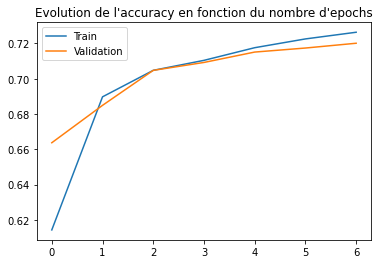

<IPython.core.display.Javascript object>

In [244]:
plot_accuracy_loss(history_simple_GRU_fasttext_model)

### <span style='color:#019DA0'>Synth√®se :</span>
- Les r√©sultats sont moins bons avec ce mod√®le compar√© au mod√®le GloVe :
    - l'accuracy est moins √©lev√©e (meilleure accuracy = 0.72 vs 0.775 pour le mod√®le GloVe classique),
    - le temps d'ex√©cution de l'entrainement est plus long (environ 3 minutes vs moins de 1min 50s pour le mod√®le GloVe),
- Il n'y a en revanche pratiquement pas d'overfitting.

### <span style='color:#6A00B3'>Mod√®le pr√©entrain√© sur des Tweets : GloVe Twitter</span>

#### Chargement du mod√®le : GloVe word embedding Tweeter 27-billion and 100-dimensional text
- Construction du dictionnaire contenant chaque mot (cl√©) et son vector embedding (valeur)
- Taille des vecteurs GloVe Twitter = 100

In [245]:
glove_tweeter_embeddings_index = {}

with open(path_dataset + "glove.twitter.27B.100d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        glove_tweeter_embeddings_index[word] = coefs
    f.close()

print("Found %s word vectors." % len(glove_tweeter_embeddings_index))

Found 1193514 word vectors.


<IPython.core.display.Javascript object>

#### Taille du dictionnaire du mod√®le GloVe

In [246]:
len(glove_tweeter_embeddings_index)

1193514

<IPython.core.display.Javascript object>

#### Taille des vecteurs de mots du mod√®le GloVe

In [247]:
len(glove_tweeter_embeddings_index["good"])

100

<IPython.core.display.Javascript object>

#### Exemple de vecteur de mot

In [248]:
glove_tweeter_embeddings_index["good"]

array([ 9.1552e-02,  9.3336e-02, -2.8113e-02,  3.6990e-01,  1.8956e-01,
        4.3191e-01,  1.0266e-01,  3.4092e-01, -3.8717e-01,  5.0772e-02,
       -4.8289e-01, -3.7883e-01, -5.0020e+00, -2.7927e-01, -1.4578e-01,
       -1.0818e-01,  3.9178e-01, -4.5798e-01, -5.4712e-01, -2.0868e-01,
       -3.3495e-02,  1.0765e-01, -1.7093e-01, -1.0107e-01,  1.1071e-01,
       -1.7558e-01, -3.5739e-01,  1.5897e-01,  7.9770e-02, -9.7594e-01,
       -3.9054e-01,  1.5097e-01, -5.6339e-01,  5.0047e-01,  1.7436e-01,
        6.8966e-01,  2.6879e-01, -4.7430e-01, -1.4947e-02,  2.3483e-01,
       -9.4609e-01, -5.5384e-02,  2.7673e-01,  4.1185e-01,  3.5373e-01,
        3.6709e-01, -1.4923e-01, -6.6414e-02,  2.5766e-01, -3.6882e-03,
       -6.6522e-01,  7.5965e-02, -3.0112e-01, -1.5115e-01,  3.5540e-01,
        5.9782e-01, -2.0585e-01, -4.8643e-01,  6.6179e-01, -1.3902e-01,
        2.4042e-02, -9.1297e-01, -2.1795e-01,  4.9977e-01,  4.9224e-02,
       -4.8337e-01, -5.1529e-01, -6.8428e-01, -2.4887e-01,  5.98

<IPython.core.display.Javascript object>

#### Cr√©ation de la matrice embedding GloVe Tweeter
- Matrice contenant pour chaque mot du vocabulaire (word_to_index.items()) le vecteur embedding correspondant
- Taille de la matrice = nombre mots dans le vocabulaire * taille des vecteurs embeddings

In [249]:
GLOVE_TWEETER_EMBEDDING_DIMENSION = 100

glove_tweeter_embedding_matrix = np.zeros(
    (vocabulary_size, GLOVE_TWEETER_EMBEDDING_DIMENSION)
)

for word, i in word_to_index.items():
    embedding_vector = glove_tweeter_embeddings_index.get(word)
    if embedding_vector is not None:
        glove_tweeter_embedding_matrix[i] = embedding_vector

<IPython.core.display.Javascript object>

#### Taille de la matrice embedding

In [250]:
glove_tweeter_embedding_matrix.shape

(31834, 100)

<IPython.core.display.Javascript object>

In [251]:
glove_tweeter_embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.96210002e-04,  4.56699997e-01,  3.38900000e-01, ...,
        -4.29100007e-01,  1.07459998e+00, -3.65500003e-01],
       ...,
       [ 9.47669968e-02, -6.71450019e-01, -1.81160003e-01, ...,
        -7.22249985e-01, -1.66069999e-01,  7.91869998e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.68279982e-01,  1.52909994e-01,  7.04050004e-01, ...,
         3.63420010e-01, -5.23840010e-01, -3.90480012e-01]])

<IPython.core.display.Javascript object>

#### Test de la matrice embedding

In [252]:
word_to_index["good"]

30

<IPython.core.display.Javascript object>

In [253]:
glove_tweeter_embeddings_index.get("good")

array([ 9.1552e-02,  9.3336e-02, -2.8113e-02,  3.6990e-01,  1.8956e-01,
        4.3191e-01,  1.0266e-01,  3.4092e-01, -3.8717e-01,  5.0772e-02,
       -4.8289e-01, -3.7883e-01, -5.0020e+00, -2.7927e-01, -1.4578e-01,
       -1.0818e-01,  3.9178e-01, -4.5798e-01, -5.4712e-01, -2.0868e-01,
       -3.3495e-02,  1.0765e-01, -1.7093e-01, -1.0107e-01,  1.1071e-01,
       -1.7558e-01, -3.5739e-01,  1.5897e-01,  7.9770e-02, -9.7594e-01,
       -3.9054e-01,  1.5097e-01, -5.6339e-01,  5.0047e-01,  1.7436e-01,
        6.8966e-01,  2.6879e-01, -4.7430e-01, -1.4947e-02,  2.3483e-01,
       -9.4609e-01, -5.5384e-02,  2.7673e-01,  4.1185e-01,  3.5373e-01,
        3.6709e-01, -1.4923e-01, -6.6414e-02,  2.5766e-01, -3.6882e-03,
       -6.6522e-01,  7.5965e-02, -3.0112e-01, -1.5115e-01,  3.5540e-01,
        5.9782e-01, -2.0585e-01, -4.8643e-01,  6.6179e-01, -1.3902e-01,
        2.4042e-02, -9.1297e-01, -2.1795e-01,  4.9977e-01,  4.9224e-02,
       -4.8337e-01, -5.1529e-01, -6.8428e-01, -2.4887e-01,  5.98

<IPython.core.display.Javascript object>

In [254]:
simple_GRU_glovetweeter_model = Sequential()
simple_GRU_glovetweeter_model.add(
    Embedding(
        vocabulary_size,
        GLOVE_TWEETER_EMBEDDING_DIMENSION,
        weights=[glove_tweeter_embedding_matrix],
        input_length=MAX_WORD_LENGTH,
        trainable=False,
    )
)
simple_GRU_glovetweeter_model.add(GRU(units=NUM_NEURONS))
simple_GRU_glovetweeter_model.add(Dense(units=1, activation="sigmoid"))
simple_GRU_glovetweeter_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
simple_GRU_glovetweeter_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 27, 100)           3183400   
_________________________________________________________________
gru_3 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 3,206,251
Trainable params: 22,851
Non-trainable params: 3,183,400
_________________________________________________________________


<IPython.core.display.Javascript object>

In [255]:
%%time
history_simple_GRU_glovetweeter_model = simple_GRU_glovetweeter_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val))

Epoch 1/7
313/313 [==============================] - 17s 46ms/step - loss: 0.6346 - accuracy: 0.6018 - val_loss: 0.5068 - val_accuracy: 0.7574
Epoch 2/7
313/313 [==============================] - 14s 46ms/step - loss: 0.4780 - accuracy: 0.7697 - val_loss: 0.4781 - val_accuracy: 0.7712
Epoch 3/7
313/313 [==============================] - 14s 45ms/step - loss: 0.4547 - accuracy: 0.7866 - val_loss: 0.4685 - val_accuracy: 0.7765
Epoch 4/7
313/313 [==============================] - 14s 44ms/step - loss: 0.4429 - accuracy: 0.7909 - val_loss: 0.4649 - val_accuracy: 0.7804
Epoch 5/7
313/313 [==============================] - 13s 43ms/step - loss: 0.4345 - accuracy: 0.7982 - val_loss: 0.4660 - val_accuracy: 0.7813
Epoch 6/7
313/313 [==============================] - 14s 43ms/step - loss: 0.4228 - accuracy: 0.8026 - val_loss: 0.4703 - val_accuracy: 0.7830
Epoch 7/7
313/313 [==============================] - 14s 44ms/step - loss: 0.4067 - accuracy: 0.8145 - val_loss: 0.4624 - val_accuracy: 0.7827

<IPython.core.display.Javascript object>

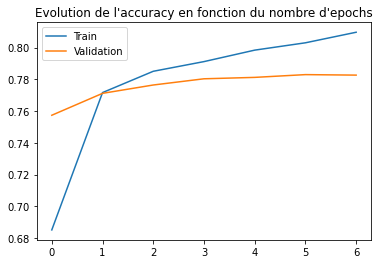

<IPython.core.display.Javascript object>

In [256]:
plot_accuracy_loss(history_simple_GRU_glovetweeter_model)

### <span style='color:#019DA0'>Synth√®se :</span>

- Les r√©sulats sont meilleurs avec ce plongement de mots GloVe entrain√© sur des Tweets compar√© au plongement de mots GloVe 'classique' :
    - L'accuracy est l√©g√®rement plus √©lev√©e (meilleure accuracy = 0.783 vs 0.777 pour le mod√®le GloVe classique)
    - Le temps d'ex√©cution est plus faible (1min 38s vs 1min 55s pour le mod√®le GloVe classique)
    - L'overfitting a diminu√©
> Nous s√©lectionnons donc ce plongement de mots comme couche d'embedding et nous allons optimiser les hyper param√®tres du meilleur mod√®le : **simple GRU avec couche de plongement de mots fournie au r√©seau de type GloVe pr√©entrain√© sur des Tweets**

>>## <span style='color:#D15C22' id="section_4_5_2" >4.5.2 Optimisation des hyperparam√®tres avec KerasTuner</span>

#### Param√®tres √† optimiser :
- Pourcentage de Dropout : nous avons ajout√© 2 couches de type Dropout pour diminuer l'overfitting
- Vitesse d'apprentissage (Learning Rate)                          

In [257]:
def build_simple_GRU_glovetweeter_optim_model(hp):

    simple_GRU_glovetweeter_optim_model = Sequential()

    simple_GRU_glovetweeter_optim_model.add(
        Embedding(
            vocabulary_size,
            GLOVE_TWEETER_EMBEDDING_DIMENSION,
            weights=[glove_tweeter_embedding_matrix],
            input_length=MAX_WORD_LENGTH,
            trainable=False,
        )
    )

    hp_dropout = hp.Float("dropout1", min_value=0, max_value=0.5, step=0.1, default=0.5)
    simple_GRU_glovetweeter_optim_model.add(Dropout(rate=hp_dropout))

    simple_GRU_glovetweeter_optim_model.add(GRU(units=NUM_NEURONS))

    hp_dropout = hp.Float("dropout2", min_value=0, max_value=0.5, step=0.1, default=0.5)
    simple_GRU_glovetweeter_optim_model.add(Dropout(rate=hp_dropout))

    simple_GRU_glovetweeter_optim_model.add(Dense(units=1, activation="sigmoid"))

    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    simple_GRU_glovetweeter_optim_model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(hp_learning_rate),
        metrics=["accuracy"],
    )

    simple_GRU_glovetweeter_optim_model.summary()

    return simple_GRU_glovetweeter_optim_model

<IPython.core.display.Javascript object>

In [258]:
tuner = RandomSearch(
    build_simple_GRU_glovetweeter_optim_model,
    objective="val_accuracy",
    max_trials=10,
    seed=SEED,
    directory="kerasTuner",
    overwrite=True
    # executions_per_trial=3
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 27, 100)           3183400   
_________________________________________________________________
dropout (Dropout)            (None, 27, 100)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 3,206,251
Trainable params: 22,851
Non-trainable params: 3,183,400
_________________________________________________________________


<IPython.core.display.Javascript object>

In [259]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
dropout1 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
dropout2 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


<IPython.core.display.Javascript object>

In [260]:
tuner.search(
    X_train_sample_pad, y_train_sample, epochs=7, validation_data=(X_val_pad, y_val)
)

Trial 10 Complete [00h 04m 35s]
val_accuracy: 0.769257128238678

Best val_accuracy So Far: 0.7870285511016846
Total elapsed time: 00h 44m 43s
INFO:tensorflow:Oracle triggered exit


<IPython.core.display.Javascript object>

In [261]:
tuner.results_summary()

Results summary
Results in kerasTuner/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout1: 0.1
dropout2: 0.2
learning_rate: 0.001
Score: 0.7870285511016846
Trial summary
Hyperparameters:
dropout1: 0.30000000000000004
dropout2: 0.1
learning_rate: 0.001
Score: 0.7833714485168457
Trial summary
Hyperparameters:
dropout1: 0.30000000000000004
dropout2: 0.2
learning_rate: 0.001
Score: 0.7811428308486938
Trial summary
Hyperparameters:
dropout1: 0.4
dropout2: 0.1
learning_rate: 0.001
Score: 0.7809714078903198
Trial summary
Hyperparameters:
dropout1: 0.0
dropout2: 0.0
learning_rate: 0.01
Score: 0.774657130241394
Trial summary
Hyperparameters:
dropout1: 0.2
dropout2: 0.5
learning_rate: 0.01
Score: 0.769257128238678
Trial summary
Hyperparameters:
dropout1: 0.2
dropout2: 0.0
learning_rate: 0.01
Score: 0.7687143087387085
Trial summary
Hyperparameters:
dropout1: 0.5
dropout2: 0.2
learning_rate: 0.01
Score: 0.7543143033981323


<IPython.core.display.Javascript object>

In [262]:
simple_GRU_embed_glove_optim_best_model = tuner.get_best_models(1)[0]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 27, 100)           3183400   
_________________________________________________________________
dropout (Dropout)            (None, 27, 100)           0         
_________________________________________________________________
gru (GRU)                    (None, 50)                22800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 3,206,251
Trainable params: 22,851
Non-trainable params: 3,183,400
_________________________________________________________________


<IPython.core.display.Javascript object>

In [263]:
simple_GRU_embed_glove_optim_best_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 27),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'embedding_input'}},
  {'class_name': 'Embedding',
   'config': {'name': 'embedding',
    'trainable': False,
    'batch_input_shape': (None, 27),
    'dtype': 'float32',
    'input_dim': 31834,
    'output_dim': 100,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'activity_regularizer': None,
    'embeddings_constraint': None,
    'mask_zero': False,
    'input_length': 27}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.1,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'GRU',
   'config': {'name': 'gru',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'retur

<IPython.core.display.Javascript object>

In [264]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

<IPython.core.display.Javascript object>

In [265]:
best_hyperparameters.values

{'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.001}

<IPython.core.display.Javascript object>

### <span style='color:#019DA0'>Synth√®se :</span>
- Les meilleurs hyper param√®tres sont les suivants :
    - Premi√®re couche de Dropout = 10%
    - Seconde couche de Dropout = 20%
    - Learning rate = 0.001
- L'optimisation am√©liore l√©g√®rement l'accuracy (meilleure accuracy = 0.788 vs 0.785 pour le mod√®le sans optimisation des hyper-param√®tres)
- L'optimisation diminue l'overfitting.

>>## <span style='color:#D15C22' id="section_4_5_3" >4.5.3 D√©termination du nombre optimal d'epochs</span>

In [266]:
%%time
history_simple_GRU_embed_glove_optim_best_model = simple_GRU_embed_glove_optim_best_model.fit(X_train_sample_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(X_val_pad, y_val))

Epoch 1/7
313/313 [==============================] - 33s 62ms/step - loss: 0.4156 - accuracy: 0.8087 - val_loss: 0.4572 - val_accuracy: 0.7857
Epoch 2/7
313/313 [==============================] - 17s 53ms/step - loss: 0.4074 - accuracy: 0.8126 - val_loss: 0.4572 - val_accuracy: 0.7885
Epoch 3/7
313/313 [==============================] - 16s 50ms/step - loss: 0.4034 - accuracy: 0.8157 - val_loss: 0.4542 - val_accuracy: 0.7868
Epoch 4/7
313/313 [==============================] - 16s 50ms/step - loss: 0.3962 - accuracy: 0.8194 - val_loss: 0.4568 - val_accuracy: 0.7881
Epoch 5/7
313/313 [==============================] - 16s 50ms/step - loss: 0.3955 - accuracy: 0.8195 - val_loss: 0.4657 - val_accuracy: 0.7840
Epoch 6/7
313/313 [==============================] - 16s 50ms/step - loss: 0.3869 - accuracy: 0.8218 - val_loss: 0.4606 - val_accuracy: 0.7892
Epoch 7/7
313/313 [==============================] - 16s 50ms/step - loss: 0.3821 - accuracy: 0.8276 - val_loss: 0.4641 - val_accuracy: 0.7876

<IPython.core.display.Javascript object>

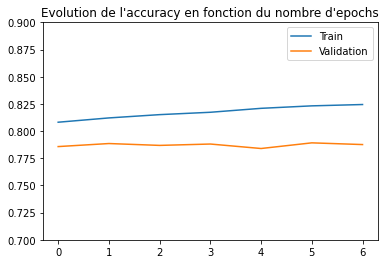

<IPython.core.display.Javascript object>

In [267]:
plt.figure()
plt.plot(history_simple_GRU_embed_glove_optim_best_model.history["accuracy"])
plt.plot(history_simple_GRU_embed_glove_optim_best_model.history["val_accuracy"])
plt.legend(["Train", "Validation"])
plt.title("Evolution de l'accuracy en fonction du nombre d'epochs")
plt.ylim(0.7, 0.9)
plt.show()

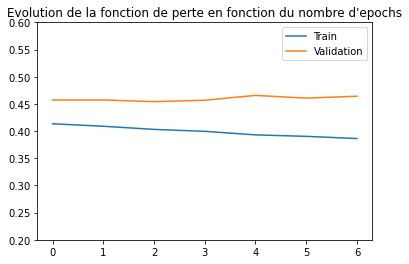

<IPython.core.display.Javascript object>

In [268]:
plt.figure()
plt.plot(history_simple_GRU_embed_glove_optim_best_model.history["loss"])
plt.plot(history_simple_GRU_embed_glove_optim_best_model.history["val_loss"])
plt.legend(["Train", "Validation"])
plt.title("Evolution de la fonction de perte en fonction du nombre d'epochs")
plt.ylim(0.2, 0.6)
plt.show()

##### Remarque : 
- L'ajout de couches Dropout a fonctionn√© : l'overfitting a diminu√©.

In [269]:
val_accuracy_per_epoch = history_simple_GRU_embed_glove_optim_best_model.history[
    "val_accuracy"
]

<IPython.core.display.Javascript object>

In [270]:
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch)) + 1

<IPython.core.display.Javascript object>

In [271]:
best_epoch

6

<IPython.core.display.Javascript object>

### <span style='color:#019DA0'>R√©capitulatif Meilleur mod√®le :</span>
- Architecture : simple GRU
- Plongement de mots : GloVe pr√©entrain√© sur des Tweets
- Hyper param√®tres :
    - Dropout = 10% & 20%
    - Learning rate = 0.001
- Nombre d'epochs : 6
> **Avec ce meilleur mod√®le on obtient une accuracy de 0.789**

- Ce mod√®le de Deep Learning donne une m√™me accuracy que celle du mod√®le de r√©f√©rence de type Machine Learning (0.79 vs 0.77)

> ### <span style='color:#6A00B3'>Comparaison avec les tweets non pr√©process√©s et pr√©process√©s 'l√©ger'</span>
> #### <span style='color:#6A00B3'>Tweets non pr√©process√©s :</span>

In [272]:
simple_GRU_embed_glove_optim_best_model_nopp = simple_GRU_embed_glove_optim_best_model

<IPython.core.display.Javascript object>

In [273]:
%%time
history_simple_GRU_embed_glove_optim_best_model_nopp = simple_GRU_embed_glove_optim_best_model_nopp.fit(X_train_sample_notpreprocessed_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=5, validation_data=(X_val_notpreprocessed_pad, y_val))

Epoch 1/5
313/313 [==============================] - 16s 50ms/step - loss: 0.3859 - accuracy: 0.8245 - val_loss: 0.4676 - val_accuracy: 0.7867
Epoch 2/5
313/313 [==============================] - 16s 51ms/step - loss: 0.3825 - accuracy: 0.8263 - val_loss: 0.4649 - val_accuracy: 0.7861
Epoch 3/5
313/313 [==============================] - 16s 50ms/step - loss: 0.3754 - accuracy: 0.8305 - val_loss: 0.4615 - val_accuracy: 0.7844
Epoch 4/5
313/313 [==============================] - 16s 51ms/step - loss: 0.3698 - accuracy: 0.8324 - val_loss: 0.4633 - val_accuracy: 0.7863
Epoch 5/5
313/313 [==============================] - 16s 50ms/step - loss: 0.3664 - accuracy: 0.8348 - val_loss: 0.4772 - val_accuracy: 0.7822
CPU times: user 5min 26s, sys: 9min 55s, total: 15min 22s
Wall time: 1min 18s


<IPython.core.display.Javascript object>

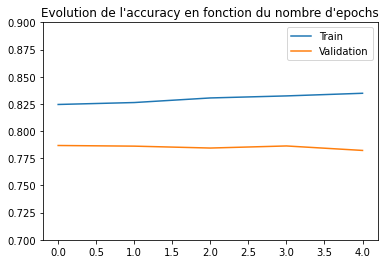

<IPython.core.display.Javascript object>

In [274]:
plt.figure()
plt.plot(history_simple_GRU_embed_glove_optim_best_model_nopp.history["accuracy"])
plt.plot(history_simple_GRU_embed_glove_optim_best_model_nopp.history["val_accuracy"])
plt.legend(["Train", "Validation"])
plt.title("Evolution de l'accuracy en fonction du nombre d'epochs")
plt.ylim(0.7, 0.9)
plt.show()

### <span style='color:#019DA0'>Synth√®se :</span>
- Les r√©sultats sont moins bons : 
    - l'accuracy est un peu moins √©lev√©e (0.78 vs 0.79 pour le mod√®le avec Tweets pr√©process√©s)
    - il y a l√©g√®rement plus d'overfitting avec le mod√®le Tweets non pr√©process√©s

> #### <span style='color:#6A00B3'>Tweets pr√©process√©s de fa√ßon 'l√©g√®re' :

In [275]:
simple_GRU_embed_glove_optim_best_model_lightpp = (
    simple_GRU_embed_glove_optim_best_model
)

<IPython.core.display.Javascript object>

In [276]:
%%time
history_simple_GRU_embed_glove_optim_best_model_lightpp = simple_GRU_embed_glove_optim_best_model.fit(X_train_sample_lightpreprocessed_pad, y_train_sample, batch_size=BATCH_SIZE, epochs=5, validation_data=(X_val_lightpreprocessed_pad, y_val))

Epoch 1/5
313/313 [==============================] - 16s 52ms/step - loss: 0.3623 - accuracy: 0.8357 - val_loss: 0.4701 - val_accuracy: 0.7825
Epoch 2/5
313/313 [==============================] - 16s 52ms/step - loss: 0.3579 - accuracy: 0.8372 - val_loss: 0.4830 - val_accuracy: 0.7839
Epoch 3/5
313/313 [==============================] - 16s 50ms/step - loss: 0.3533 - accuracy: 0.8412 - val_loss: 0.4727 - val_accuracy: 0.7813
Epoch 4/5
313/313 [==============================] - 15s 49ms/step - loss: 0.3477 - accuracy: 0.8440 - val_loss: 0.4818 - val_accuracy: 0.7824
Epoch 5/5
313/313 [==============================] - 16s 50ms/step - loss: 0.3448 - accuracy: 0.8457 - val_loss: 0.5052 - val_accuracy: 0.7799
CPU times: user 5min 27s, sys: 10min 2s, total: 15min 30s
Wall time: 1min 19s


<IPython.core.display.Javascript object>

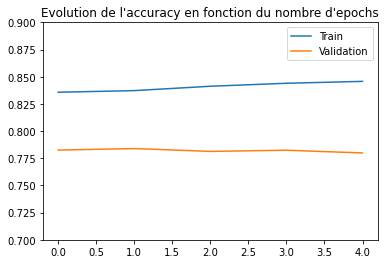

<IPython.core.display.Javascript object>

In [277]:
plt.figure()
plt.plot(history_simple_GRU_embed_glove_optim_best_model_lightpp.history["accuracy"])
plt.plot(
    history_simple_GRU_embed_glove_optim_best_model_lightpp.history["val_accuracy"]
)
plt.legend(["Train", "Validation"])
plt.title("Evolution de l'accuracy en fonction du nombre d'epochs")
plt.ylim(0.7, 0.9)
plt.show()

### <span style='color:#019DA0'>Synth√®se :</span>
- Les r√©sultats sont moins bons : 
    - l'accuracy est un peu moins √©lev√©e (0.78 vs 0.79 pour le mod√®le avec Tweets pr√©process√©s de fa√ßon compl√®te)
    - il y a l√©g√®rement plus d'overfitting avec le mod√®le Tweets pr√©process√©s de fa√ßon l√©g√®re

### <span style='color:#019DA0'>Conclusion pour le PreProcessing :</span>
- Le preprocessing des Tweets retenu permet d'am√©liorer le r√©sultat

>## <span style='color:green' id="section_4_6" >4.6. Evaluation du meilleur mod√®le optimis√©</span>

#### Entrainement du meilleur mod√®le optimis√© sur tout le jeu d'entrainement

In [278]:
%%time
history_simple_GRU_embed_glove_optim_best_model = simple_GRU_embed_glove_optim_best_model.fit(X_train_pad, y_train, batch_size=BATCH_SIZE, epochs=best_epoch, callbacks=time_callback)

Epoch 1/6
644/644 [==============================] - 26s 40ms/step - loss: 0.4119 - accuracy: 0.8117
Epoch 2/6
644/644 [==============================] - 26s 41ms/step - loss: 0.4043 - accuracy: 0.8143
Epoch 3/6
644/644 [==============================] - 26s 41ms/step - loss: 0.3977 - accuracy: 0.8202
Epoch 4/6
644/644 [==============================] - 26s 40ms/step - loss: 0.3943 - accuracy: 0.8221
Epoch 5/6
644/644 [==============================] - 25s 39ms/step - loss: 0.3908 - accuracy: 0.8232
Epoch 6/6
644/644 [==============================] - 25s 38ms/step - loss: 0.3888 - accuracy: 0.8232
CPU times: user 10min 20s, sys: 19min 39s, total: 29min 59s
Wall time: 2min 33s


<IPython.core.display.Javascript object>

#### Evaluation du meilleur mod√®le optimis√© sur le jeu de test

In [279]:
simple_GRU_embed_glove_optim_best_model_accuracy = (
    simple_GRU_embed_glove_optim_best_model.evaluate(X_test_pad, y_test)
)

644/644 [==============================] - 5s 7ms/step - loss: 0.4517 - accuracy: 0.7924


<IPython.core.display.Javascript object>

In [280]:
print(f"Accuracy score = {simple_GRU_embed_glove_optim_best_model_accuracy[1]:.3f}")

Accuracy score = 0.792


<IPython.core.display.Javascript object>

In [281]:
y_pred = simple_GRU_embed_glove_optim_best_model.predict(X_test_pad)

<IPython.core.display.Javascript object>

In [282]:
y_pred

array([[0.992444  ],
       [0.9651296 ],
       [0.93705446],
       ...,
       [0.9042294 ],
       [0.39714152],
       [0.4829851 ]], dtype=float32)

<IPython.core.display.Javascript object>

In [283]:
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

<IPython.core.display.Javascript object>

In [284]:
y_pred_classes

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

<IPython.core.display.Javascript object>

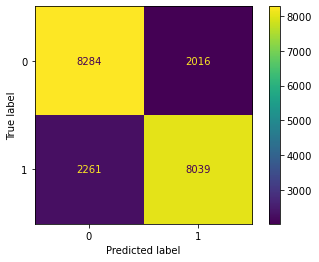

<IPython.core.display.Javascript object>

In [285]:
cm = confusion_matrix(y_test, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [286]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     10300
           1       0.80      0.78      0.79     10300

    accuracy                           0.79     20600
   macro avg       0.79      0.79      0.79     20600
weighted avg       0.79      0.79      0.79     20600



<IPython.core.display.Javascript object>

### <span style='color:#019DA0'>Synth√®se :</span>
- Sur tout le jeu d'entrainement on obtient une accuracy de **0.792**

>## <span style='color:green' id="section_4_7" >4.7. Sauvegarde du meilleur mod√®le (Format h5)</span>

In [287]:
simple_GRU_embed_glove_optim_best_model.save("airparadis_best_model.h5")

<IPython.core.display.Javascript object>

>## <span style='color:green' id="section_4_8" >4.8. Pr√©dictions sur le jeu de donn√©es 'app' pour comparaison avec les autres approches</span>

In [288]:
simple_GRU_embed_glove_optim_best_model_app_accuracy = (
    simple_GRU_embed_glove_optim_best_model.evaluate(X_app_pad, y_app)
)

63/63 [==============================] - 1s 9ms/step - loss: 0.4399 - accuracy: 0.7960


<IPython.core.display.Javascript object>

#### Accuracy

In [289]:
print(f"Accuracy score = {simple_GRU_embed_glove_optim_best_model_app_accuracy[1]:.3f}")

Accuracy score = 0.796


<IPython.core.display.Javascript object>

#### Matrice de confusion

In [290]:
y_pred_app = simple_GRU_embed_glove_optim_best_model.predict(X_app_pad)

<IPython.core.display.Javascript object>

In [291]:
y_pred_app_classes = np.where(y_pred_app > 0.5, 1, 0)

<IPython.core.display.Javascript object>

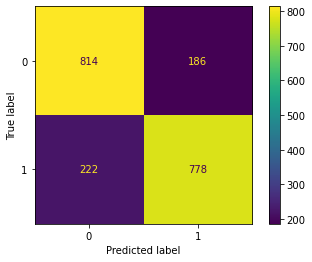

<IPython.core.display.Javascript object>

In [292]:
cm = confusion_matrix(y_app, y_pred_app_classes)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

#### Rapport de classification

In [293]:
print(classification_report(y_app, y_pred_app_classes))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.81      0.78      0.79      1000

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



<IPython.core.display.Javascript object>

#### Conclusion :
- Sur tout le jeu le jeu de donn√©es 'app' pour comparaison avec les autres approches on obtient une accuracy de **0.796**

 # <span style='color:blue' id="section_5" >5. Prototype permettant de pr√©dire le sentiment associ√© √† un tweet</span>
- Ce prototype permet de pr√©dire le sentiment associ√© √† un tweet en utilisant le mod√®le 'local', c'est √† dire le mod√®le se trouvant dans ce Notebook

>## <span style='color:green' id="section_5_1" >5.1. Fonction 'prototype' </span>
- prend en argument un Tweet
- renvoie la pr√©diction du sentiment et le score de probabilit√© associ√© au Tweet en entr√©e

In [294]:
def get_sentiment(tweet):
    tweet_clean = tweetpreprocessor.clean(tweet)
    tweet_clean_sequence = tokenizer.texts_to_sequences([tweet_clean])
    tweet_clean_pad = pad_sequences(
        tweet_clean_sequence,
        maxlen=MAX_WORD_LENGTH,
        padding=padding_type,
        truncating=trunc_type,
    )
    y_pred = simple_GRU_embed_glove_optim_best_model.predict(tweet_clean_pad)
    y_pred_classe = np.where(y_pred > 0.5, "positive", "negative")
    return f"Sentiment is : {y_pred_classe} - score = {y_pred}"

<IPython.core.display.Javascript object>

>## <span style='color:green' id="section_5_2" >5.2.  Test du mod√®le </span>
- Test sur 3 Tweets pour v√©rifier le bon fonctionnement du mod√®le. 

##### Tweet positif

In [295]:
get_sentiment("The service at AirParadis is good")

"Sentiment is : [['positive']] - score = [[0.9731026]]"

<IPython.core.display.Javascript object>

##### Tweet n√©gatif

In [296]:
get_sentiment("The service at AirParadis is bad")

"Sentiment is : [['negative']] - score = [[0.04156199]]"

<IPython.core.display.Javascript object>

##### Tweet neutre

In [297]:
get_sentiment("The service at AirParadis is average")

"Sentiment is : [['negative']] - score = [[0.28564394]]"

<IPython.core.display.Javascript object>